In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv("Internet_Inclusivity_Index_ Data_table.csv")

In [3]:
df

Country Edition  1.1.1) Internet users  \
0     Algeria      E1                   31.9   
1     Algeria      E2                   47.3   
2     Algeria      E3                   54.2   
3     Algeria      E4                   74.4   
4     Algeria      E5                   74.4   
..        ...     ...                    ...   
595  Zimbabwe      E1                   21.6   
596  Zimbabwe      E2                   22.1   
597  Zimbabwe      E3                   24.0   
598  Zimbabwe      E4                   30.3   
599  Zimbabwe      E5                   30.3   

     1.1.2) Fixed-line broadband subscribers  1.1.3) Mobile subscribers  \
0                                       5.71                      108.8   
1                                       7.05                      116.0   
2                                       7.76                      110.8   
3                                       7.26                      111.7   
4                                       8.32                      109.4   
..                                       ...                        ...   
595                                     1.19                       92.3   
596                                     1.22                       91.8   
597                                     1.32                       99.0   
598                                     1.41                       89.4   
599                                     1.40                       90.1   

     1.1.4) Gender gap in internet access  \
0                                     NaN   
1                                    22.0   
2                                    11.7   
3                                    21.7   
4                                    10.9   
..                                    ...   
595                                   NaN   
596                                  32.4   
597                                  45.2   
598                                  26.3   
599                                  13.2   

     1.1.5) Gender gap in mobile phone access  \
0                                         NaN   
1                                         7.8   
2                                         8.9   
3                                         7.3   
4                                         8.0   
..                                        ...   
595                                       NaN   
596                                       1.2   
597                                       2.5   
598                                      -2.7   
599                                      -3.7   

     1.2.1) Average fixed broadband upload speed  \
0                                           1.69   
1                                           6.12   
2                                           2.59   
3                                           1.97   
4                                           1.41   
..                                           ...   
595                                         7.60   
596                                         9.12   
597                                         9.74   
598                                        11.46   
599                                        13.30   

     1.2.2) Average fixed broadband download speed  \
0                                             3.39   
1                                             7.85   
2                                             3.77   
3                                             3.87   
4                                             3.84   
..                                             ...   
595                                           8.41   
596                                           9.52   
597                                           9.79   
598                                          12.16   
599                                          13.46   

     1.2.3) Average fixed broadband latency  ...  \
0                                     74.00  ...   
1                   

In [4]:
df.describe()

1.1.1) Internet users  1.1.2) Fixed-line broadband subscribers  \
count             600.000000                               600.000000   
mean               52.567667                                14.025367   
std                31.980416                                13.894493   
min                 0.300000                                 0.000000   
25%                20.475000                                 1.027500   
50%                59.600000                                 9.165000   
75%                82.125000                                27.037500   
max               100.000000                                46.900000   

       1.1.3) Mobile subscribers  1.1.4) Gender gap in internet access  \
count                 600.000000                            480.000000   
mean                  112.140167                             15.435000   
std                    36.383905                             18.715861   
min                    29.500000                            -16.700000   
25%                    88.400000                              2.100000   
50%                   116.000000                              8.500000   
75%                   132.850000                             26.150000   
max                   288.500000                             86.700000   

       1.1.5) Gender gap in mobile phone access  \
count                                480.000000   
mean                                   7.305208   
std                                   10.035615   
min                                  -14.100000   
25%                                    0.000000   
50%                                    4.300000   
75%                                   11.550000   
max                                   68.600000   

       1.2.1) Average fixed broadband upload speed  \
count                                   600.000000   
mean                                     21.726783   
std                                      28.702183   
min                                       0.980000   
25%                                       5.955000   
50%                                      10.980000   
75%                                      24.072500   
max                                     211.950000   

       1.2.2) Average fixed broadband download speed  \
count                                     600.000000   
mean                                       34.307583   
std                                        35.305894   
min                                         2.530000   
25%                                         9.835000   
50%                                        20.330000   
75%                                        46.280000   
max                                       203.510000   

       1.2.3) Average fixed broadband latency  \
count                              600.000000   
mean                                52.650567   
std                                 44.548324   
min                                  8.850000   
25%                                 25.742500   
50%                                 39.845000   
75%                                 60.737500   
max                                389.000000   

       1.2.4) Average mobile upload speed  \
count                          600.000000   
mean                             8.864917   
std                              4.184712   
min                              0.940000   
25%                              5.722500   
50%                              8.825000   
75%                             11.802500   
max                             23.960000   

       1.2.5) Average mobile download speed  ...  \
count                            600.000000  ...   
mean                              21.282150  ...   
std                               14.062876  ...   
min                                2.200000  ...   
25%                               10.740000  ...   
50%                               17.370000  ...   
75%               

## Data Pre-processing

Dimensionality reduction

In [5]:
#Dropping columns that are irrelevant
df.drop(['1.1.1) Internet users', '1.1.2) Fixed-line broadband subscribers', '1.1.3) Mobile subscribers', '1.1.5) Gender gap in mobile phone access', '1.2.1) Average fixed broadband upload speed', '1.2.3) Average fixed broadband latency', '1.2.4) Average mobile upload speed', '1.2.5) Average mobile download speed', '1.2.6) Average mobile latency', '4.3.1) National female e-inclusion policies', 'BG8) Cable landing stations', 'BG15) Internet users (population)', 'BG16) Offline population', 'BG22) Male mobile phone subscribers', 'BG23) Female mobile phone subscribers', 'BG1) Nominal GDP', 'BG3) Urban population', 'BG4) GNI per capita', 'BG6) Population under the poverty line'], axis = 1, inplace = True)

In [6]:
#Dropping columns that have a large number of missing values
df.drop(['1.3.4) 5G deployment','1.3.7) Unlicensed spectrum policy','1.3.8) Internet exchange points','2.2.1) Average revenue per user (ARPU, annualized)', '3.2.2) Value of e-finance', '3.2.4) Value of e-health', '3.2.7) Value of e-Commerce', '4.3.7) Government efforts to promote 5G'], axis = 1, inplace = True)

In [7]:
#Drop rows pertaining to the first edition of data (2017)
df = df[df['Edition'] != 'E1']

In [8]:
#Remove tuples corresponding to N/A values in multiple columns
df = df[df['1.3.5) Government initiatives to make Wi-Fi available'].notnull()]

Missing data

In [9]:
df.isnull().sum()

Country                                                                 0
Edition                                                                 0
1.1.4) Gender gap in internet access                                    0
1.2.2) Average fixed broadband download speed                           0
1.2.7) Bandwidth capacity                                               0
1.3.1) Network coverage (min. 2G)                                       0
1.3.2) Network coverage (min. 3G)                                       0
1.3.3) Network coverage (min. 4G)                                       0
1.3.5) Government initiatives to make Wi-Fi available                   0
1.3.6) Private sector initiatives to make Wi-Fi available               0
1.4.1) Urban electricity access                                         0
1.4.2) Rural electricity access                                         0
2.1.1) Smartphone cost (handset)                                        0
2.1.2) Mobile phone cost (prepaid tari

In [10]:
#filling the missing data with mode
func_mode = lambda x: x.mode().iloc[0]
df = df.fillna(df.groupby('Country').transform(func_mode))

In [11]:
df.isnull().sum()

Country                                                               0
Edition                                                               0
1.1.4) Gender gap in internet access                                  0
1.2.2) Average fixed broadband download speed                         0
1.2.7) Bandwidth capacity                                             0
1.3.1) Network coverage (min. 2G)                                     0
1.3.2) Network coverage (min. 3G)                                     0
1.3.3) Network coverage (min. 4G)                                     0
1.3.5) Government initiatives to make Wi-Fi available                 0
1.3.6) Private sector initiatives to make Wi-Fi available             0
1.4.1) Urban electricity access                                       0
1.4.2) Rural electricity access                                       0
2.1.1) Smartphone cost (handset)                                      0
2.1.2) Mobile phone cost (prepaid tariff)                       

### Outlier analysis

In [12]:
#convert datatypes of all attributes to float
df = df.loc[:, '1.1.4) Gender gap in internet access':'BG24) Total fixed line broadband subscribers'].astype('float64', copy = True)

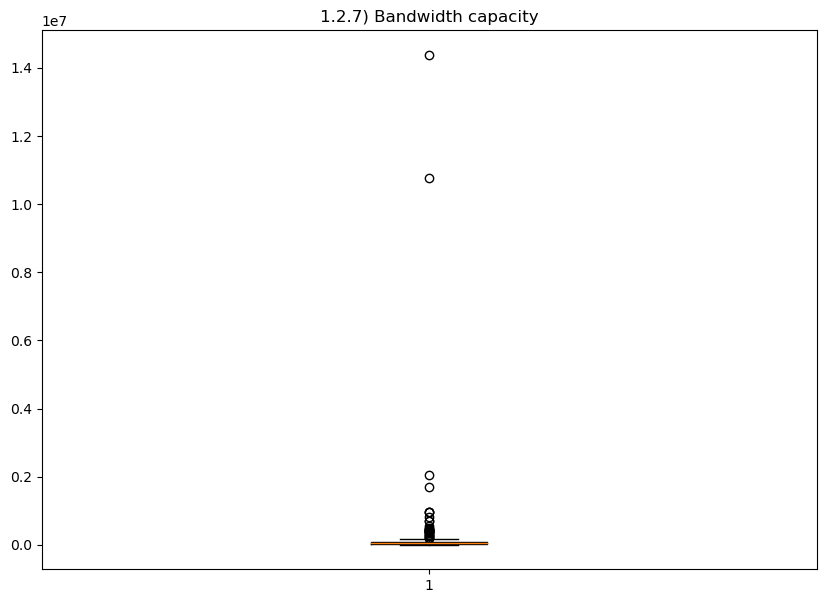

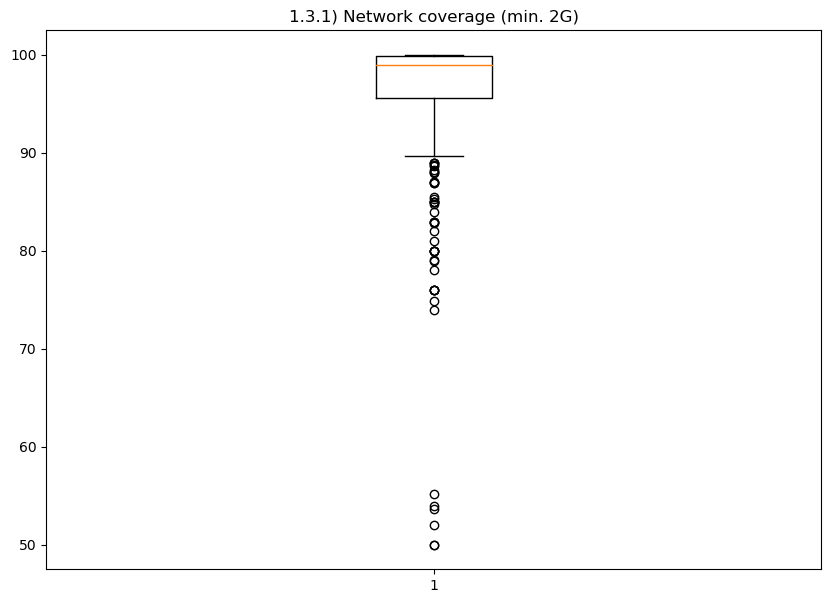

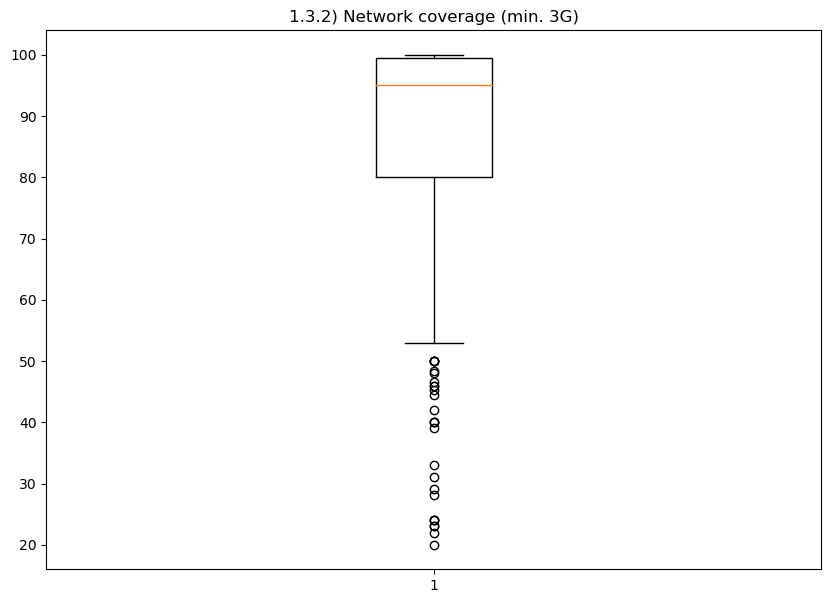

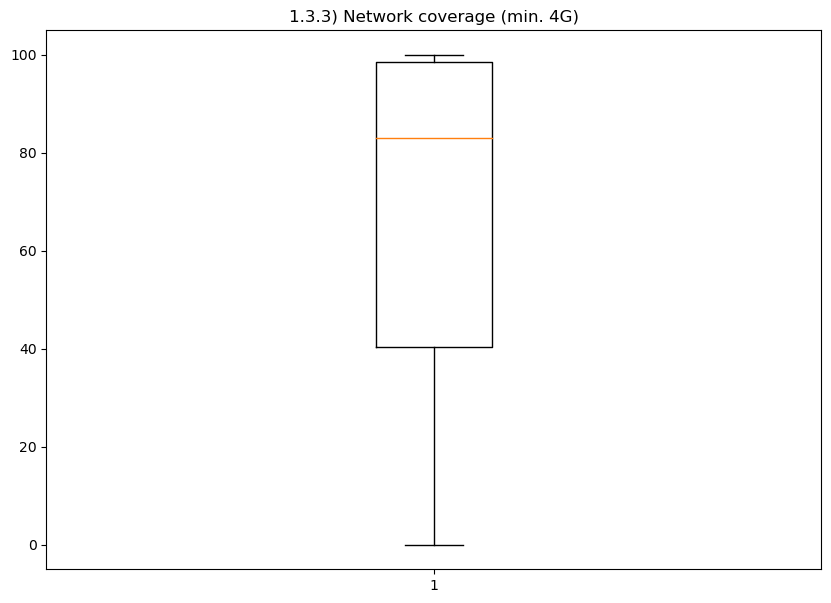

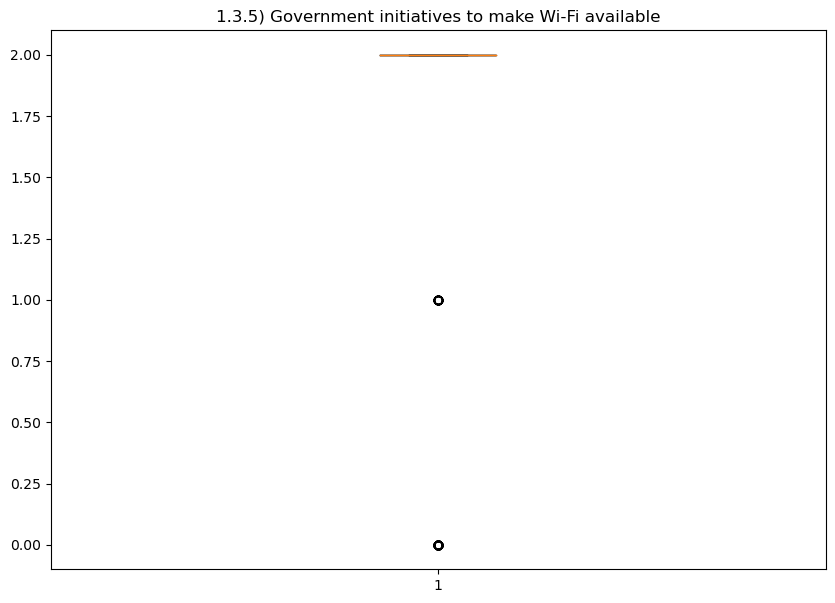

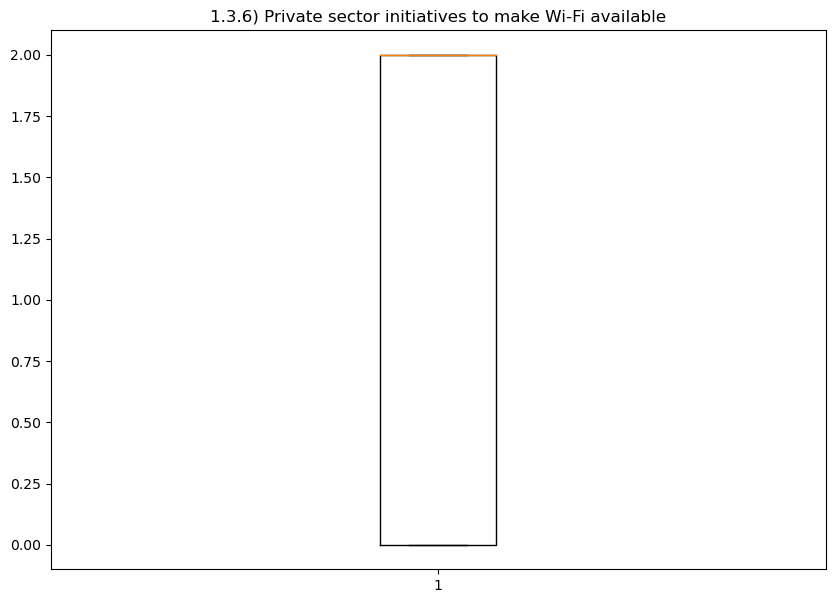

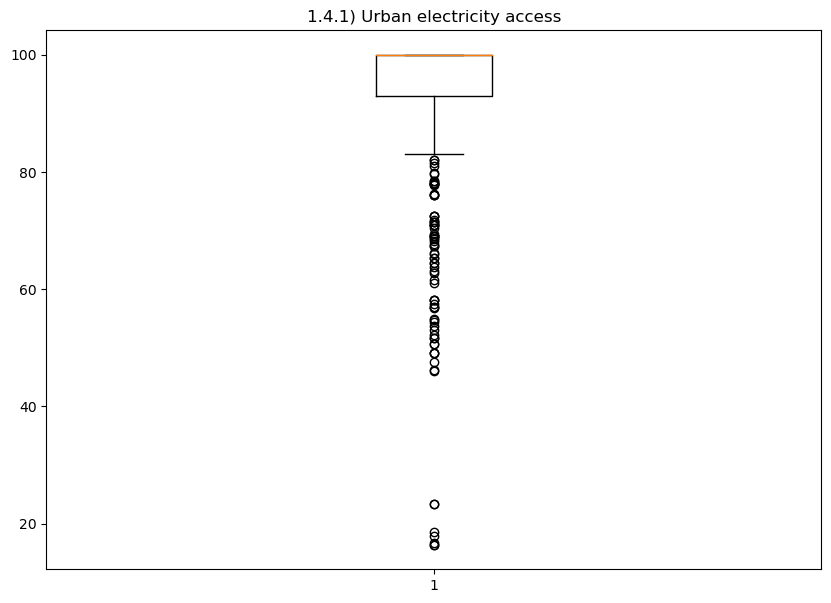

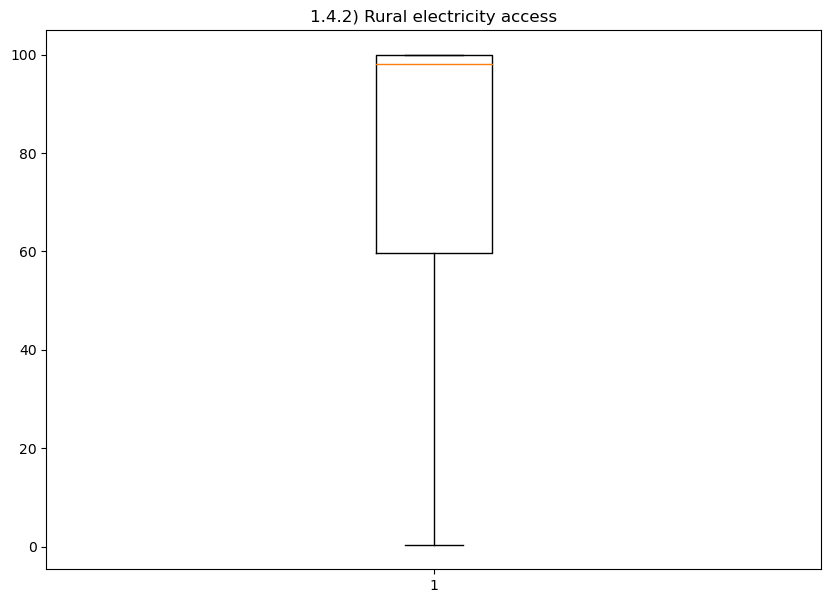

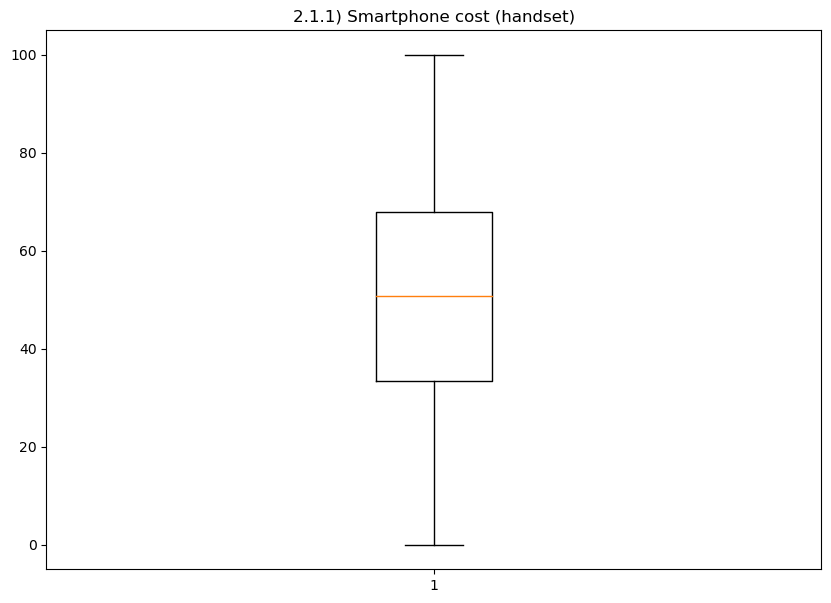

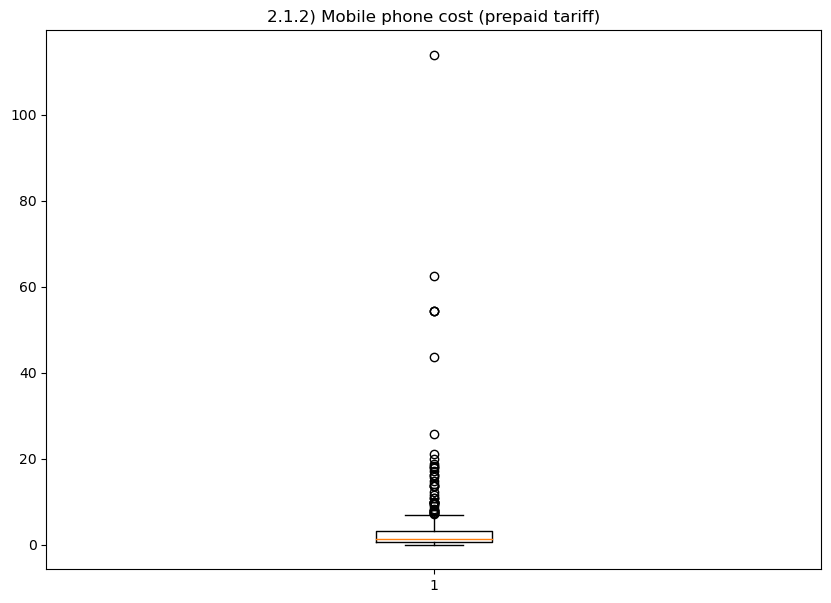

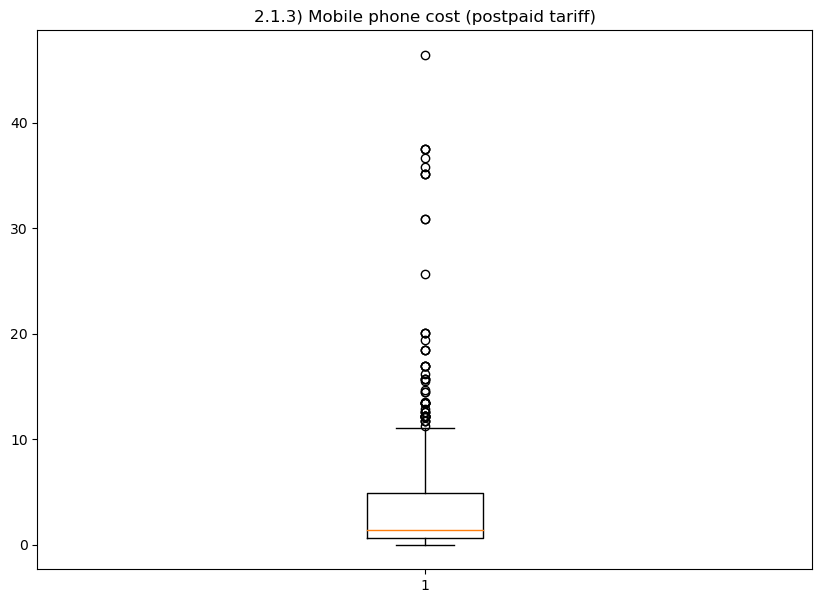

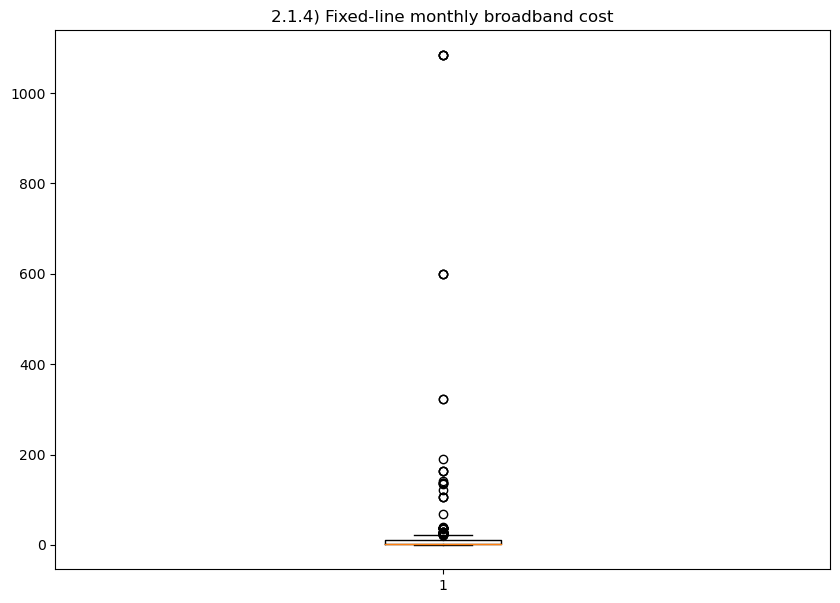

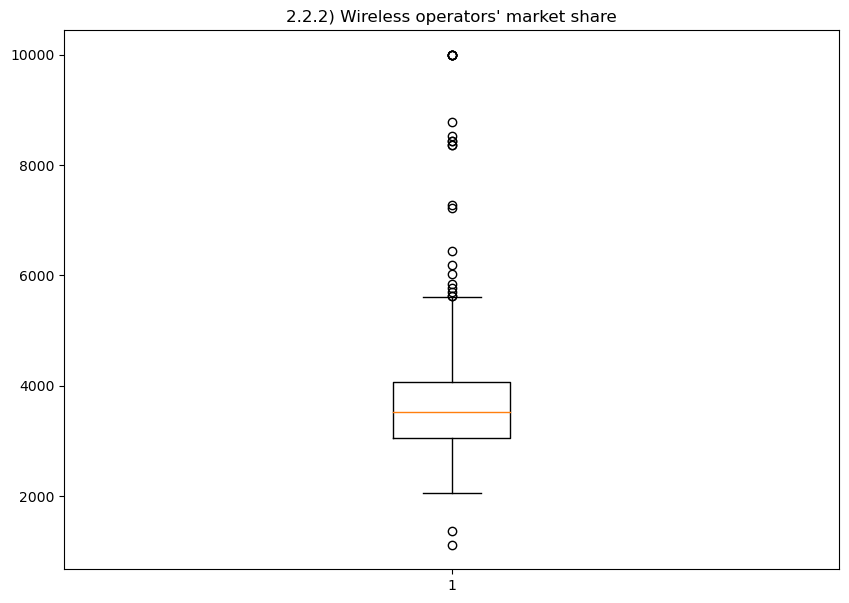

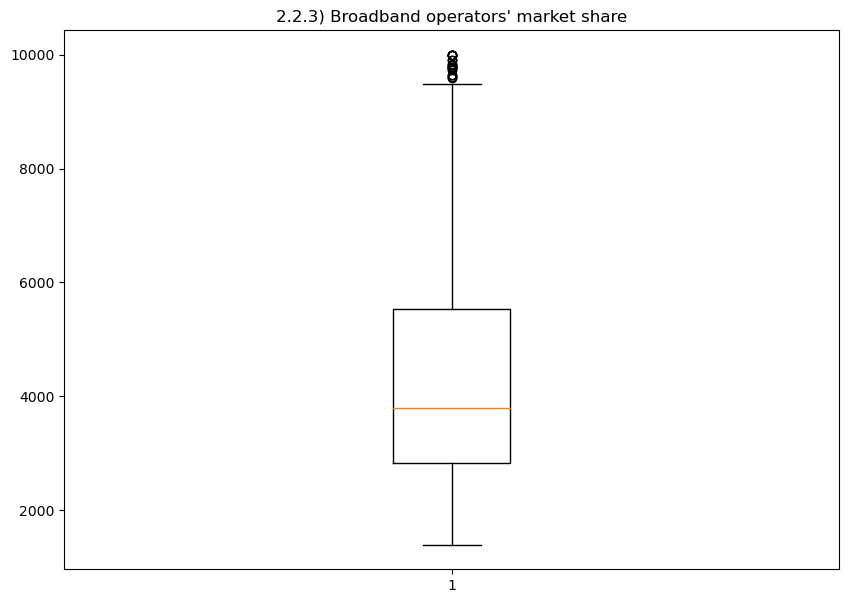

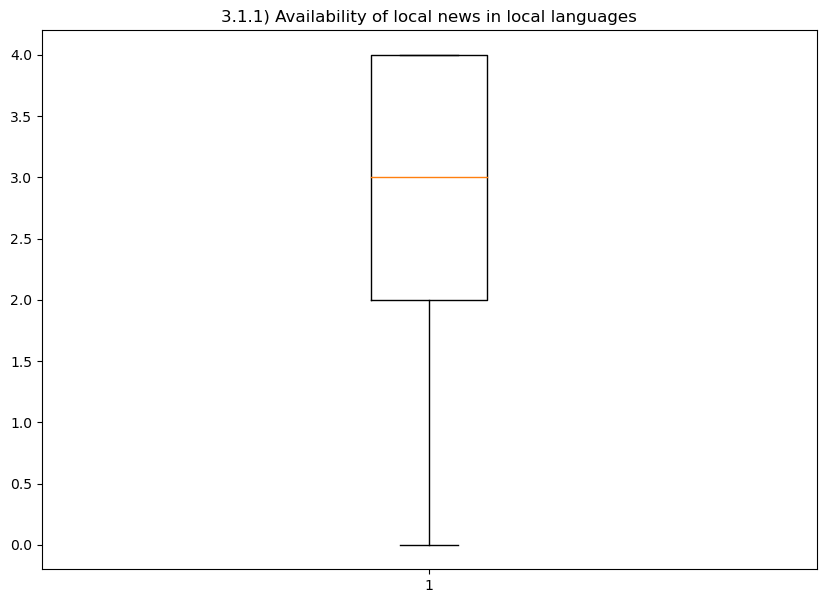

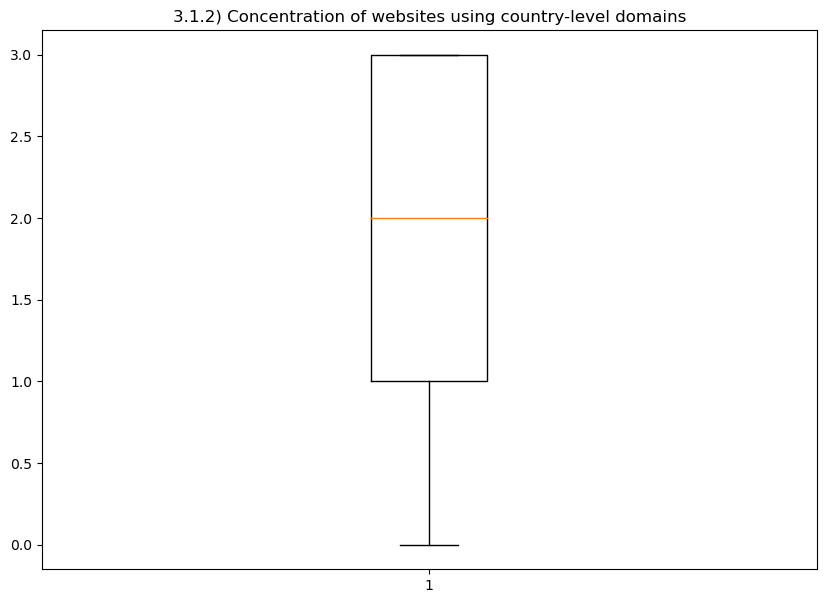

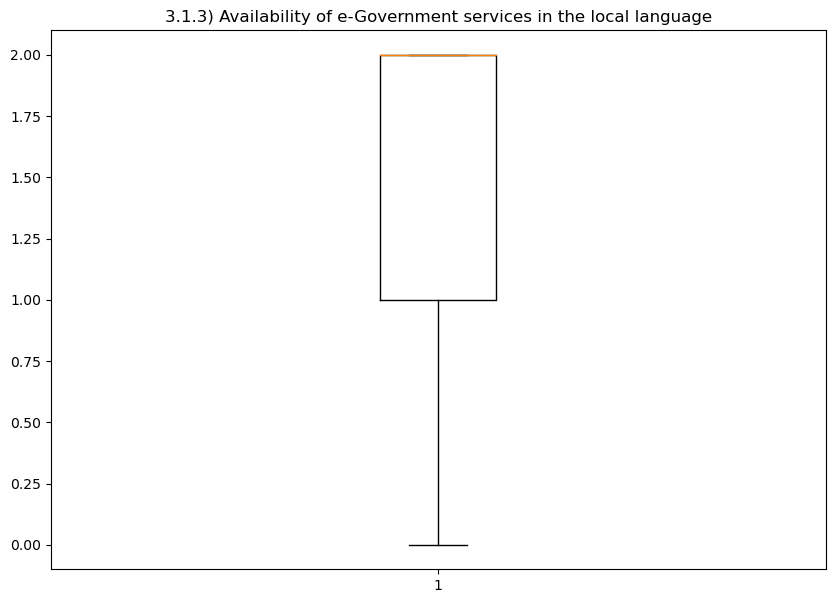

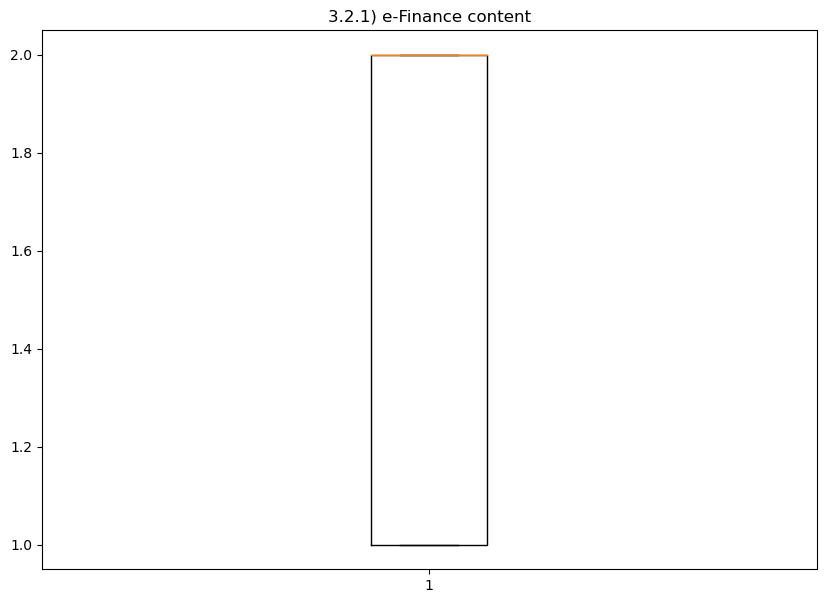

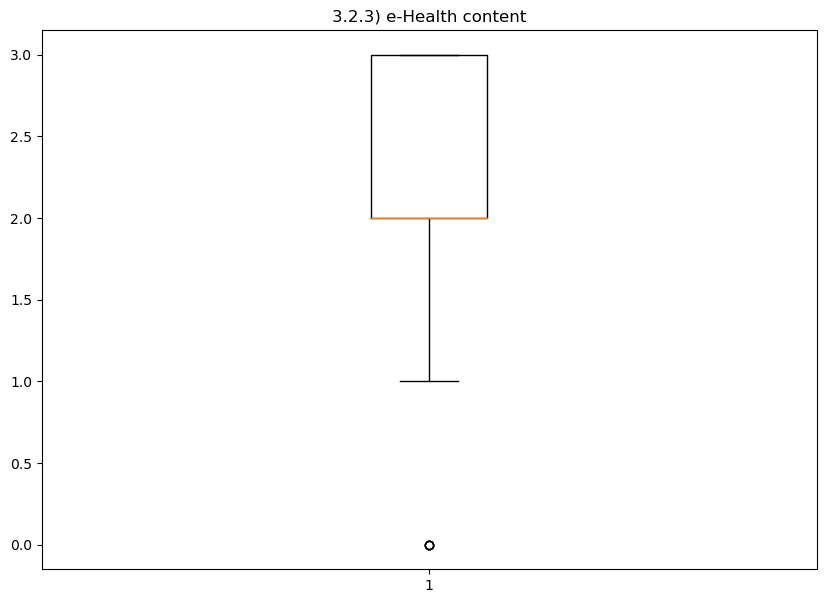

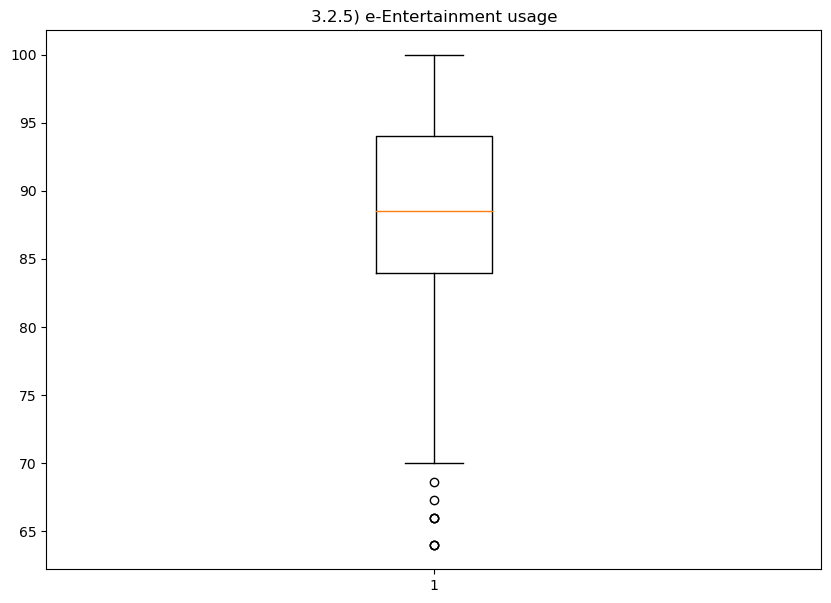

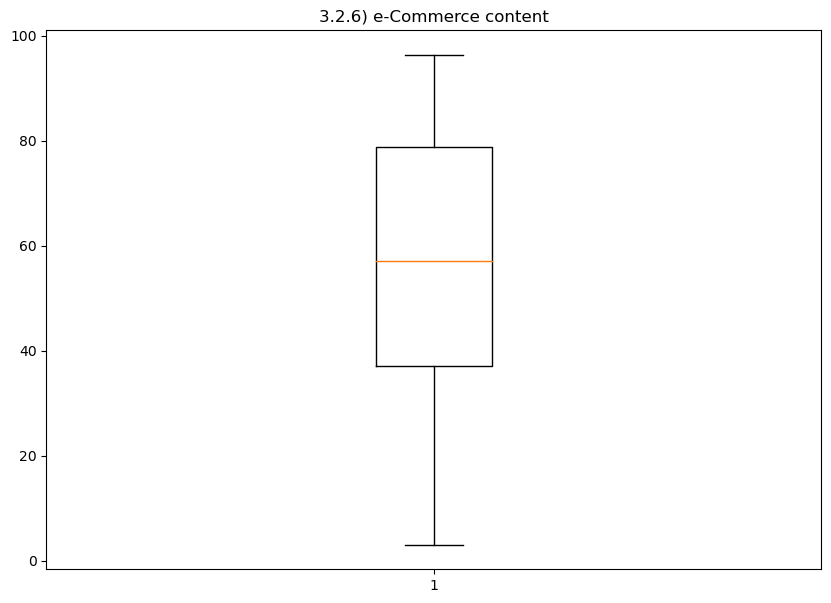

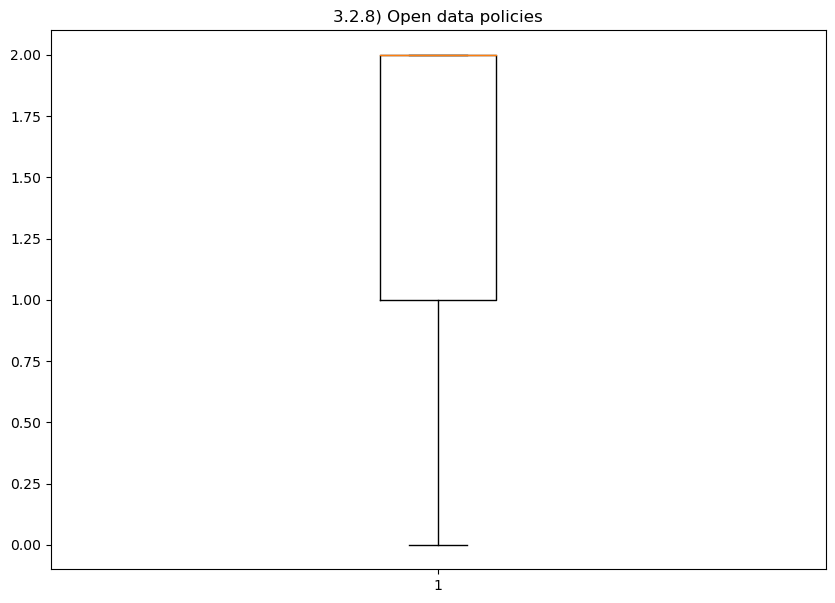

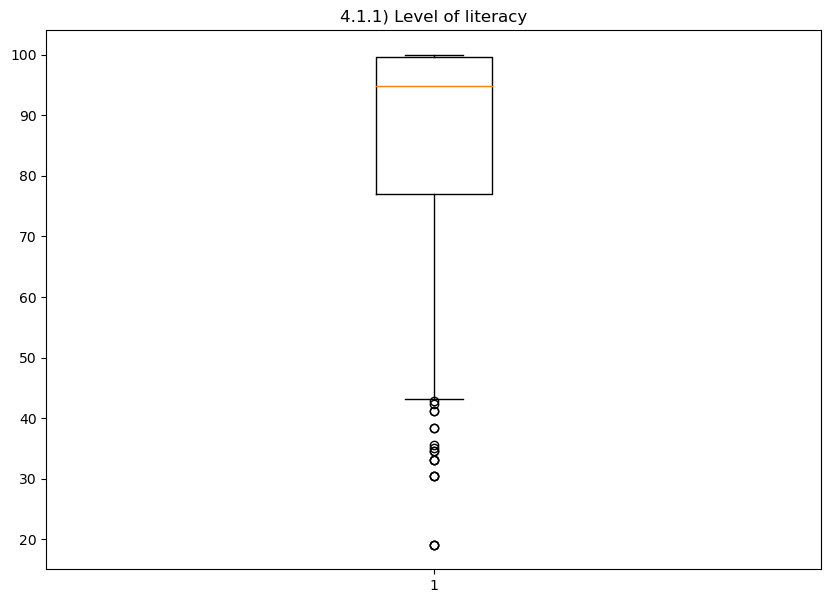

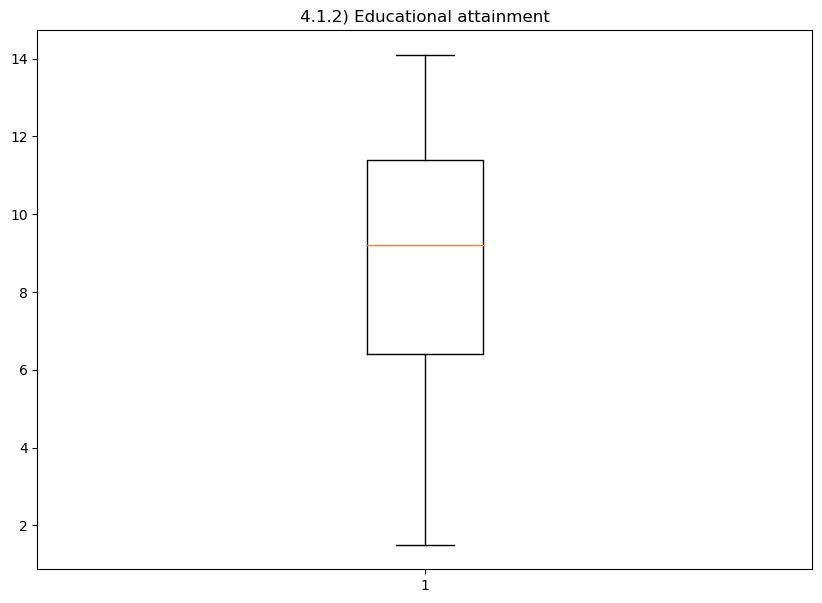

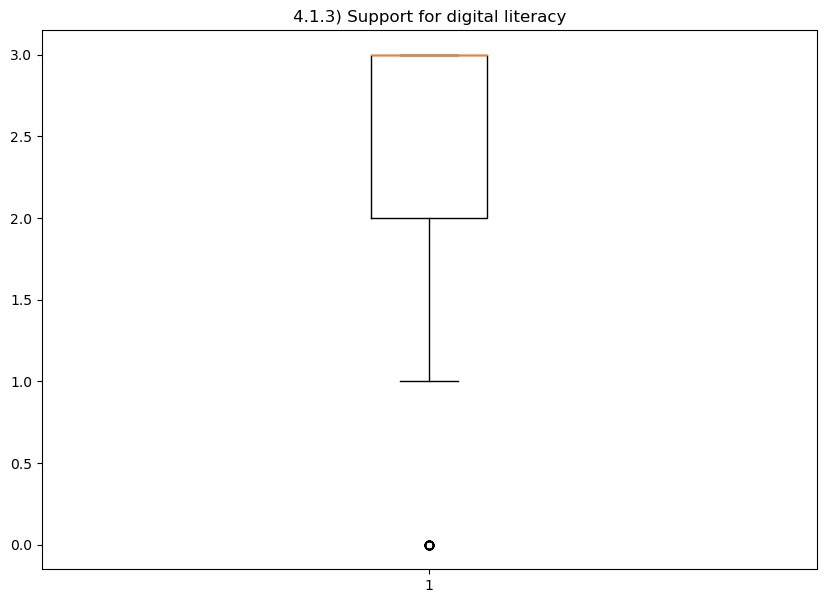

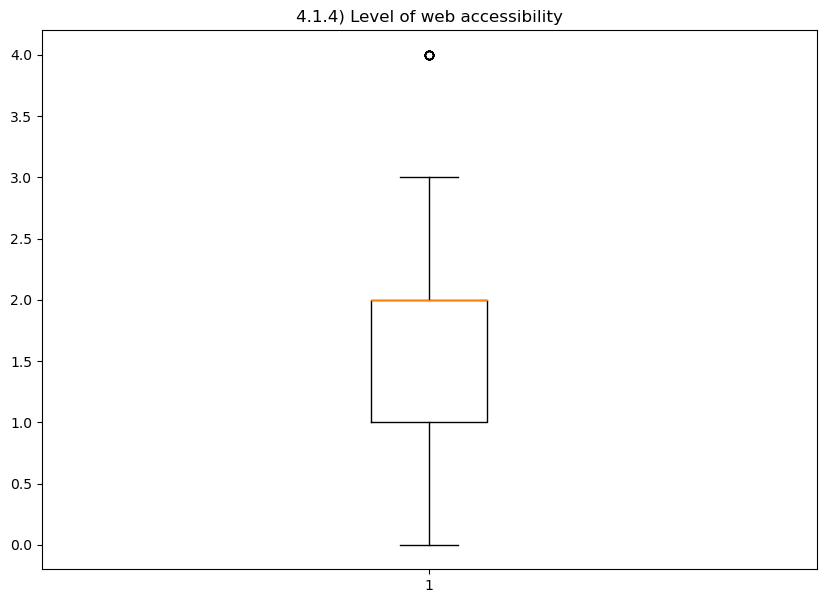

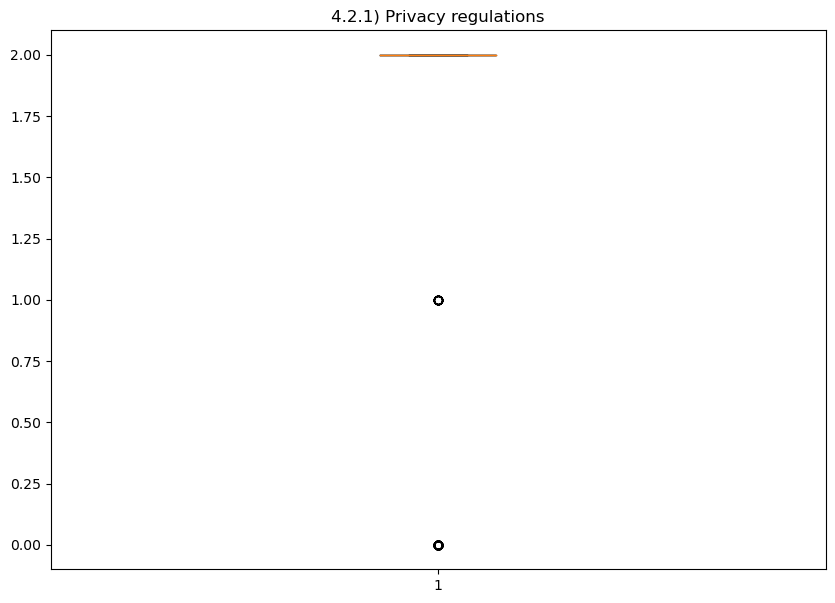

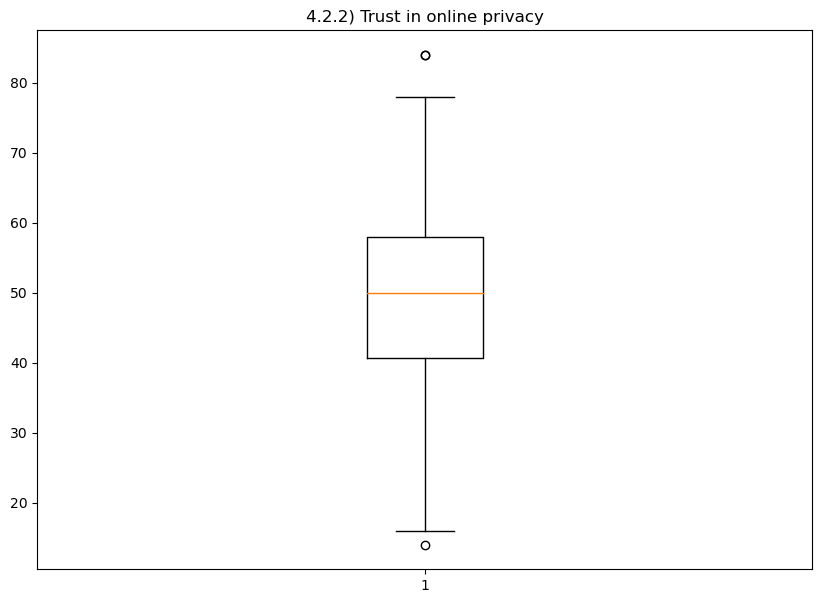

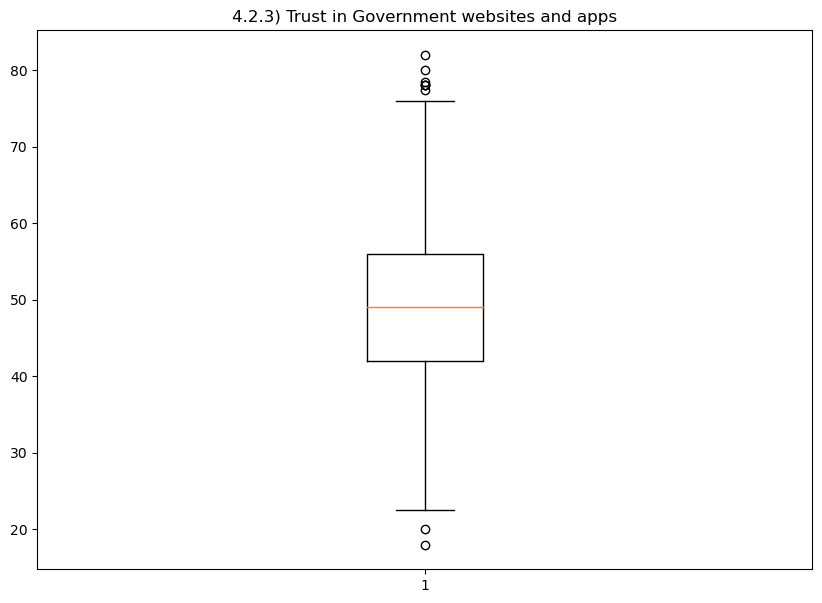

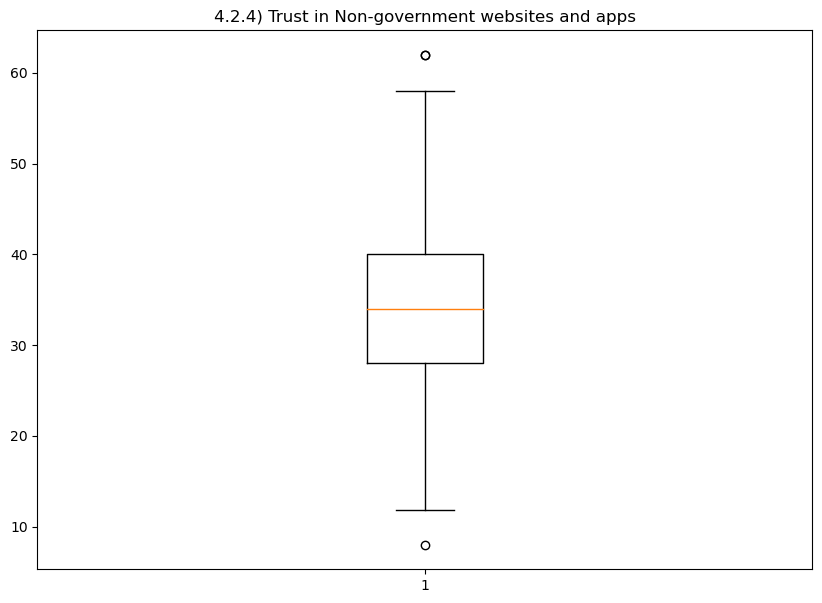

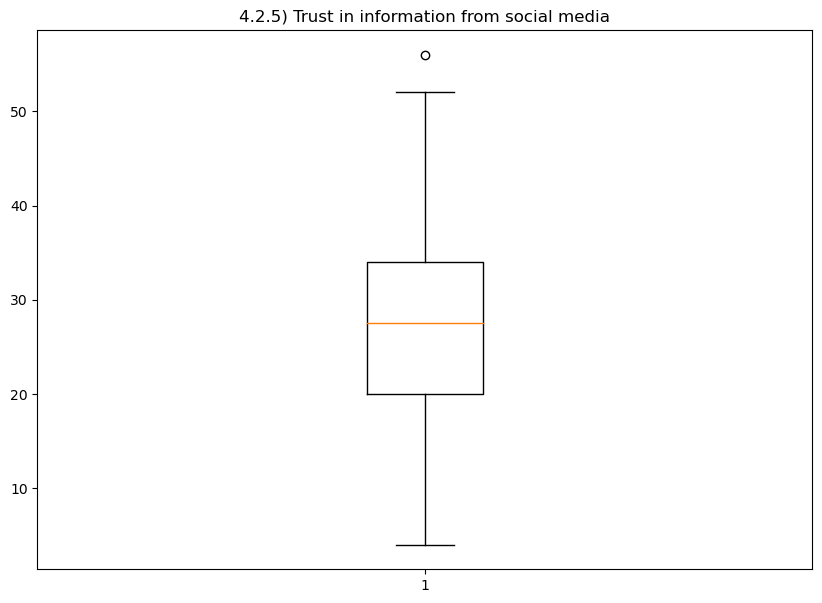

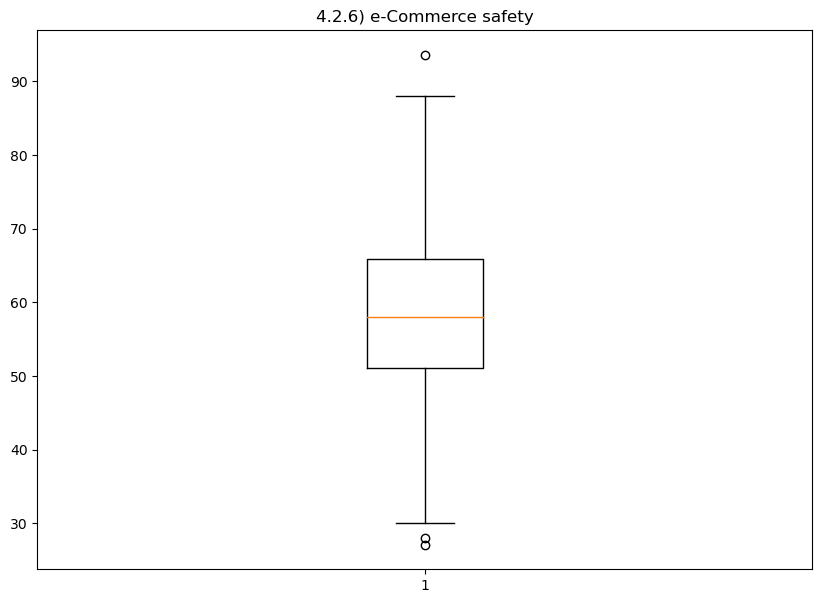

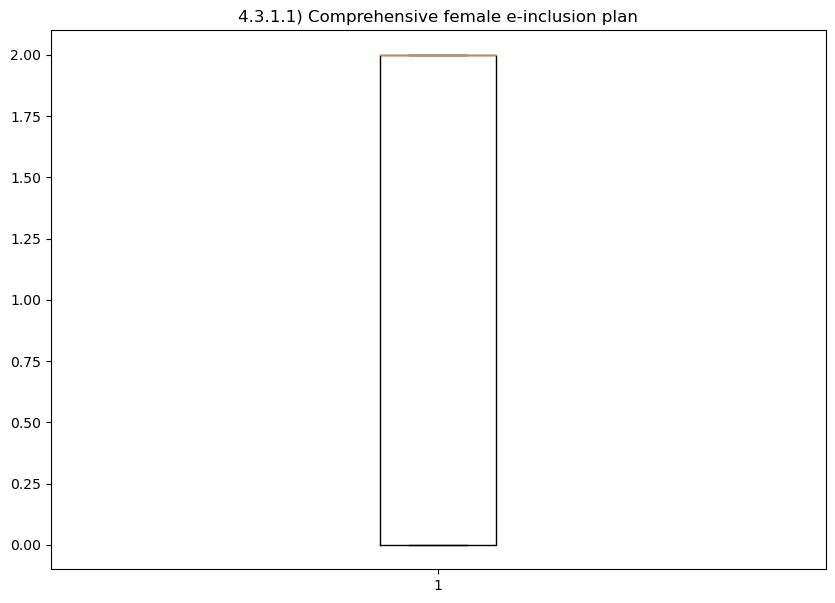

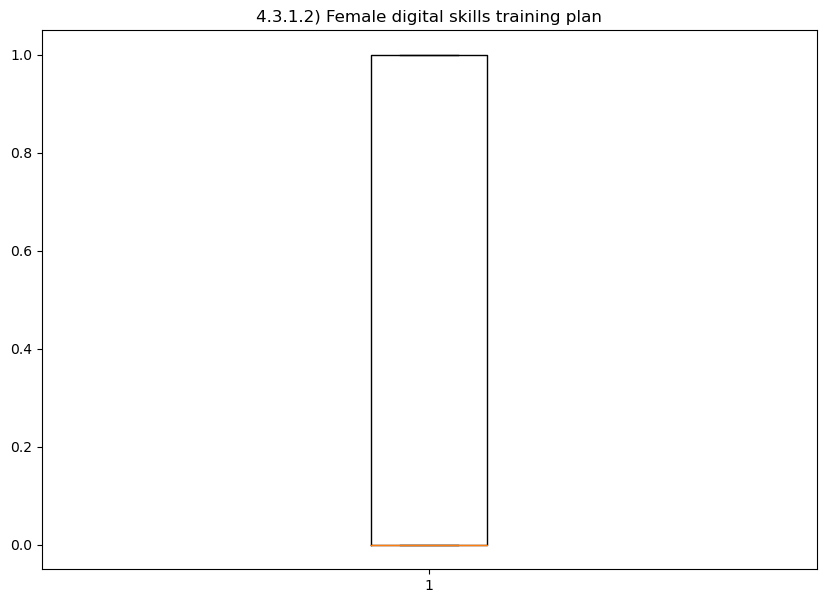

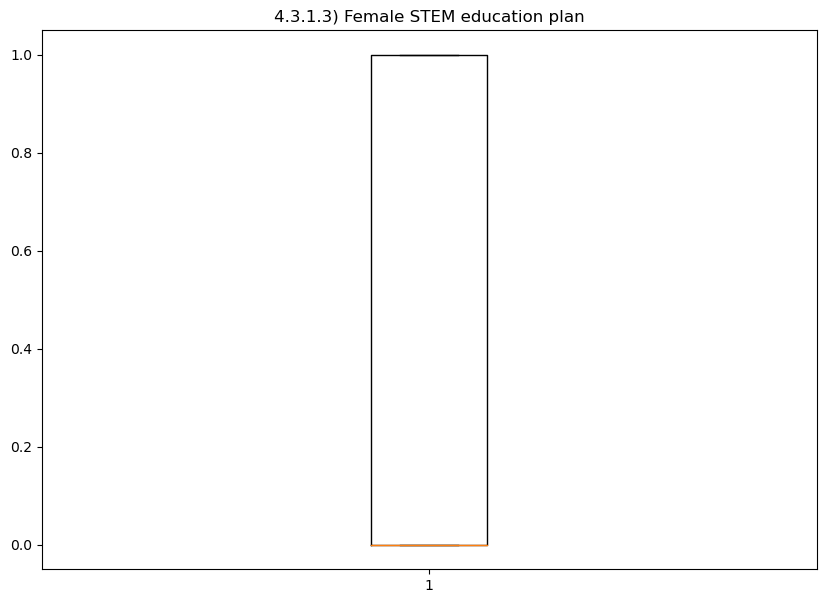

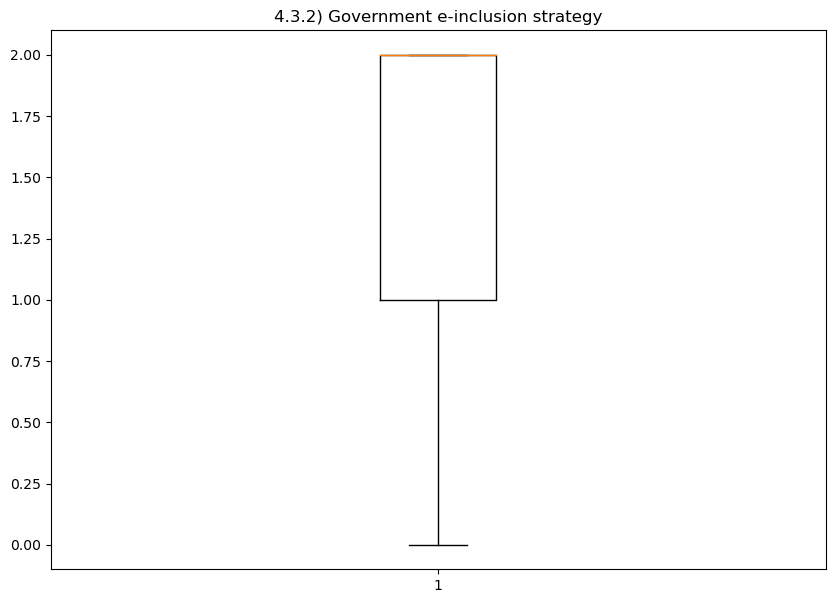

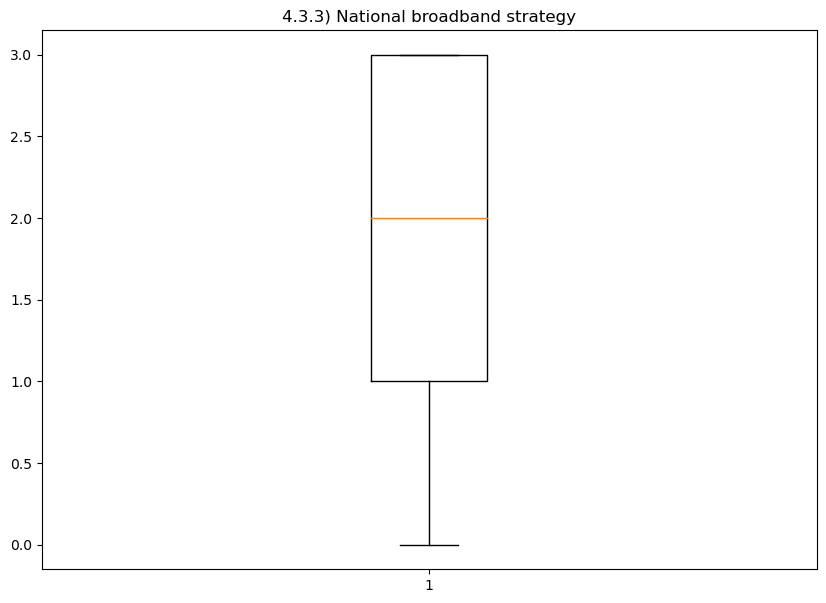

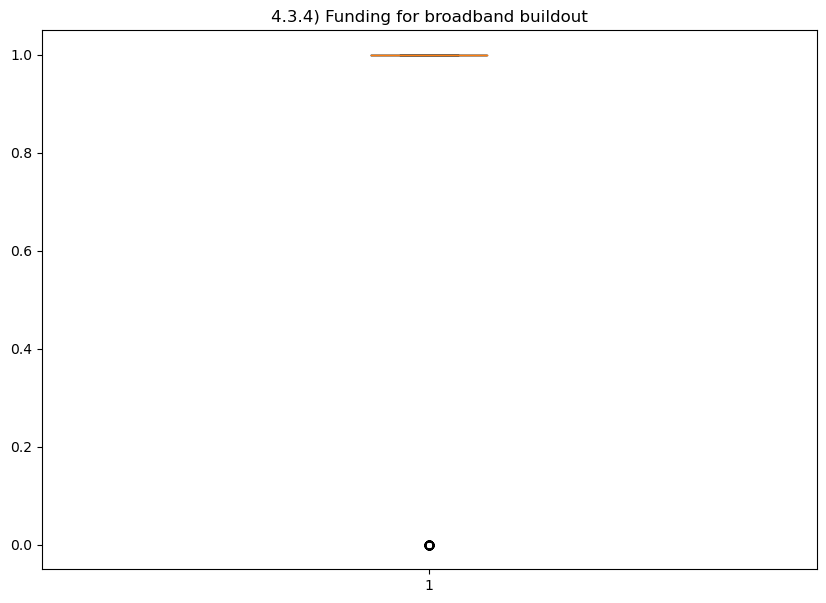

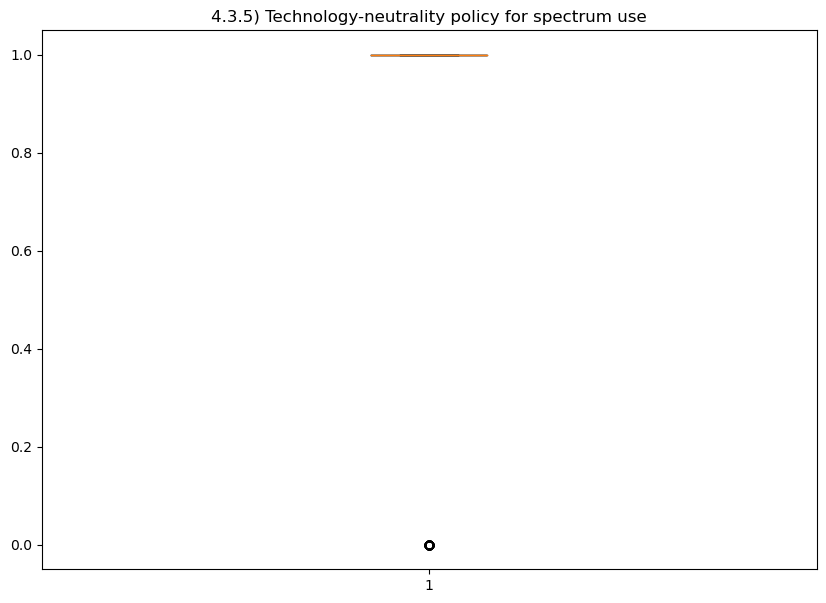

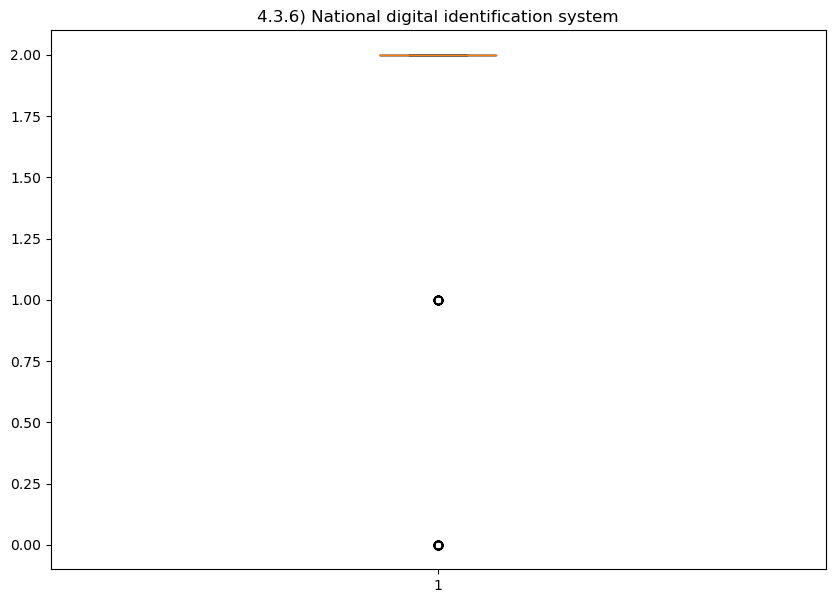

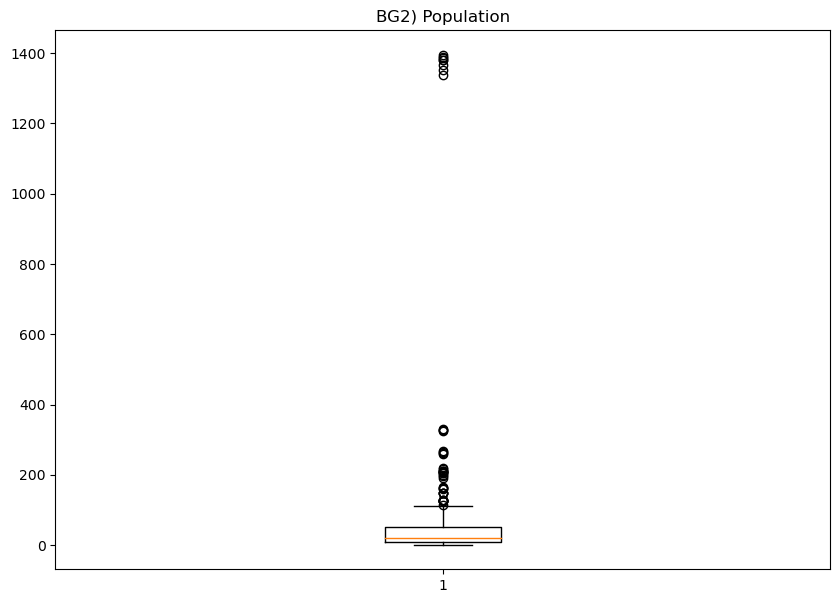

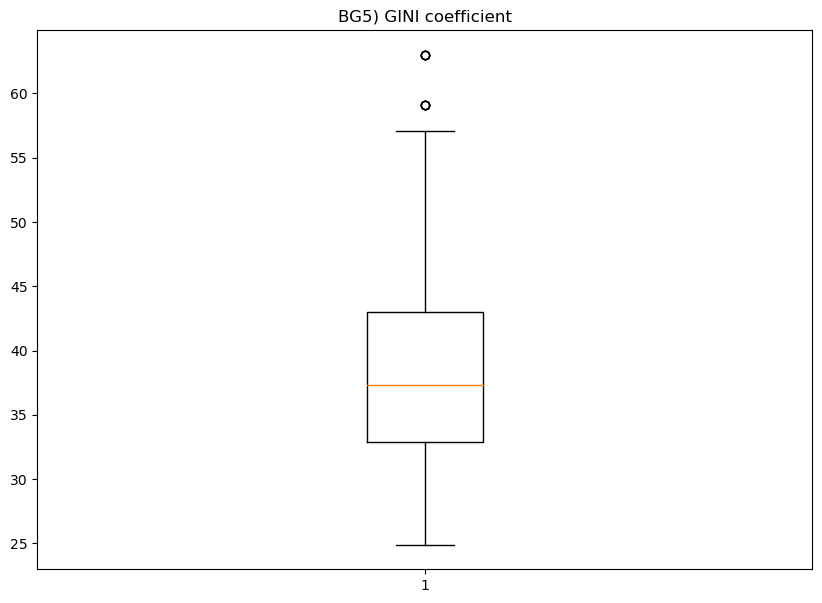

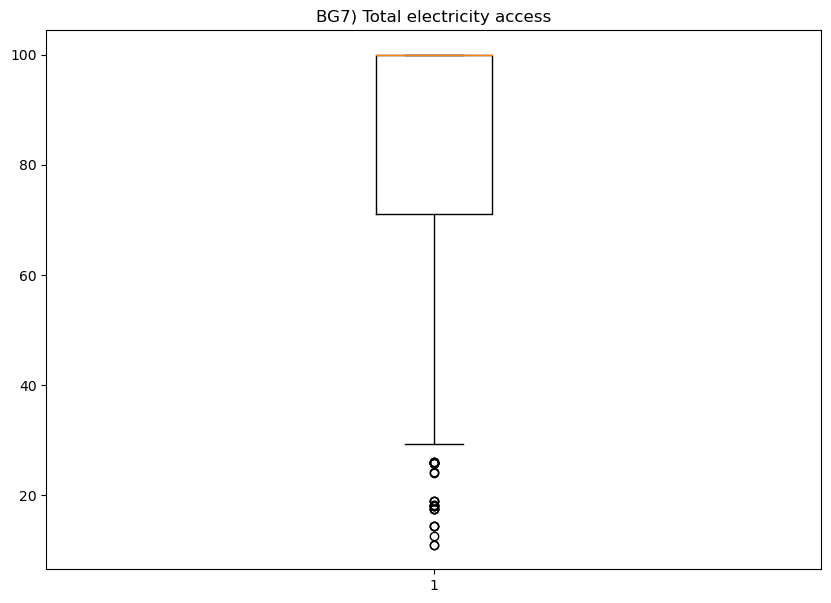

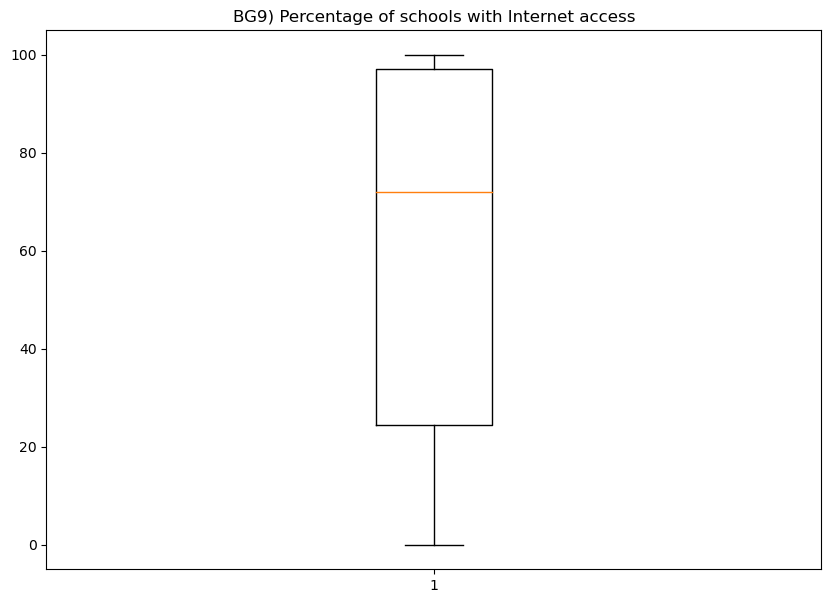

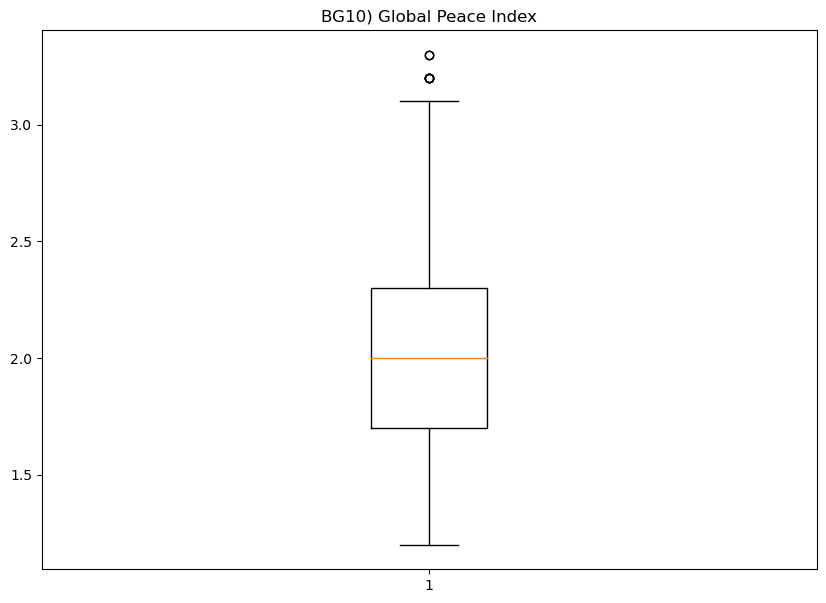

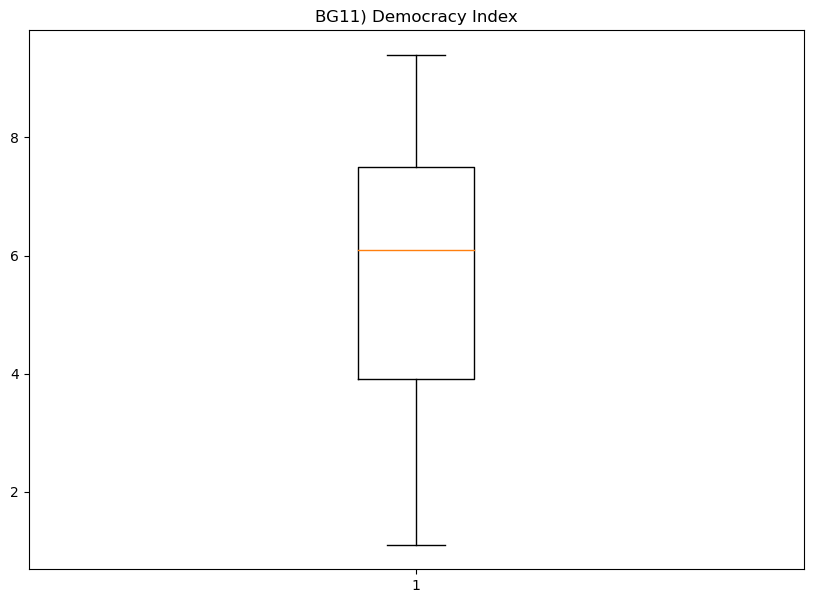

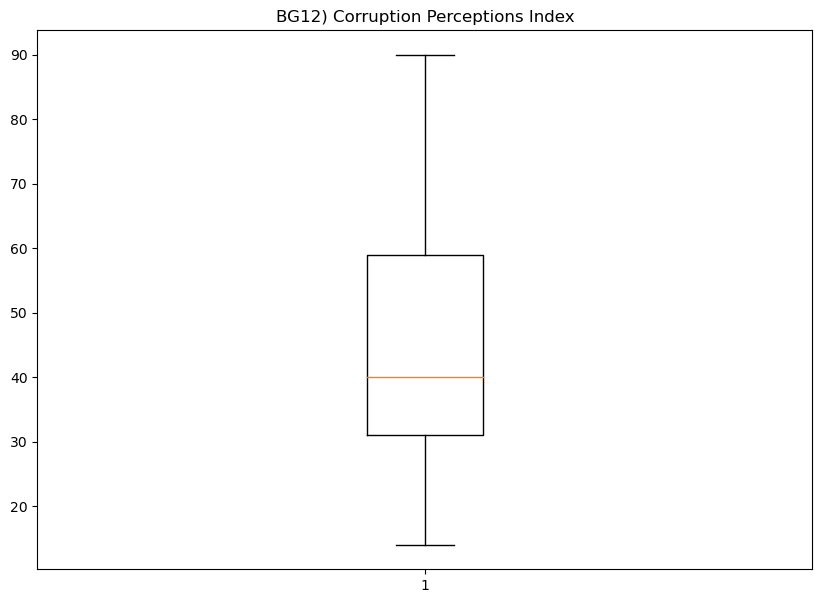

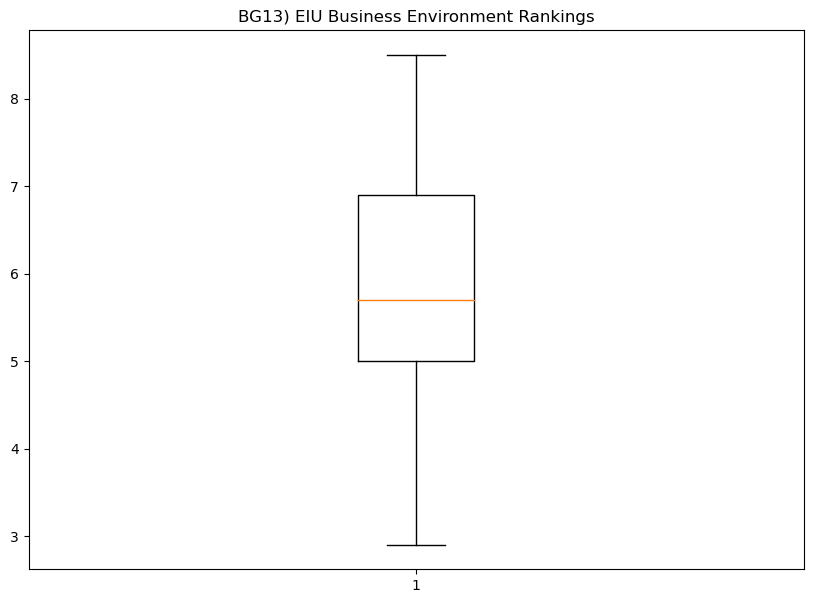

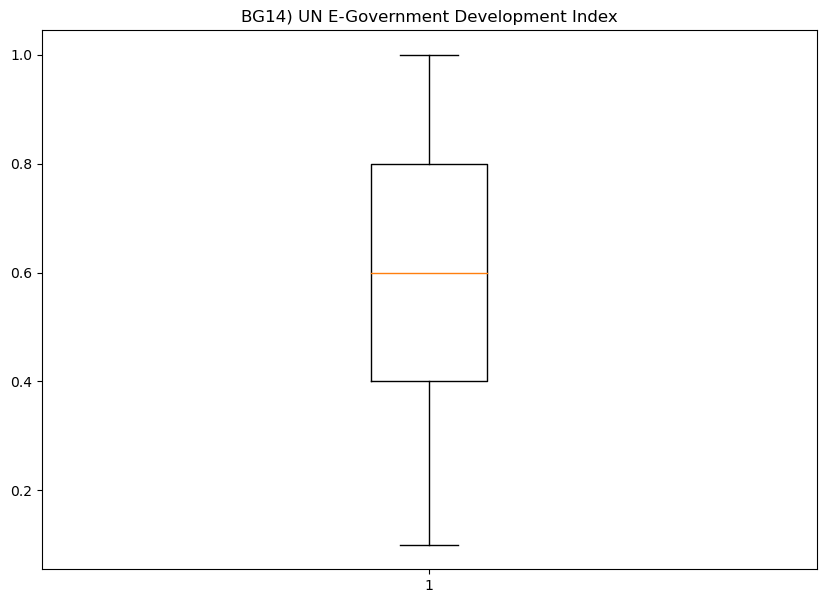

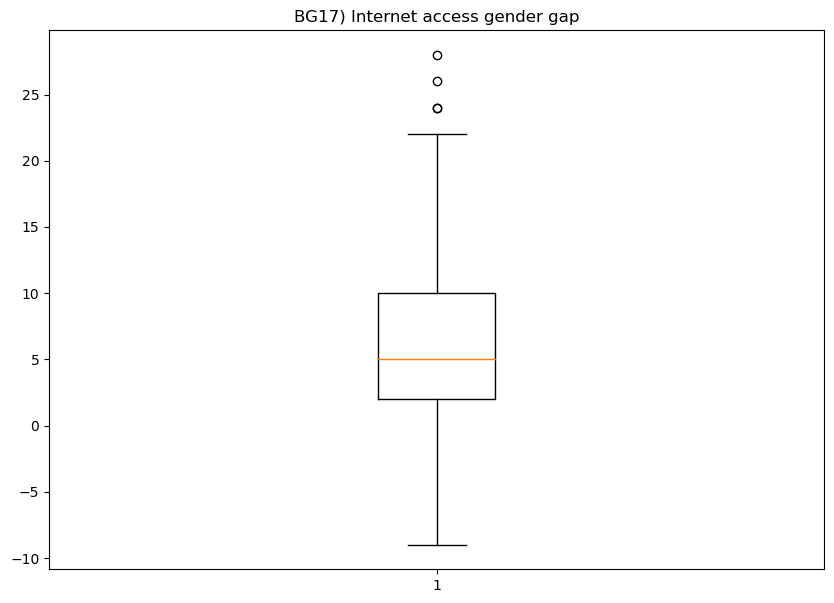

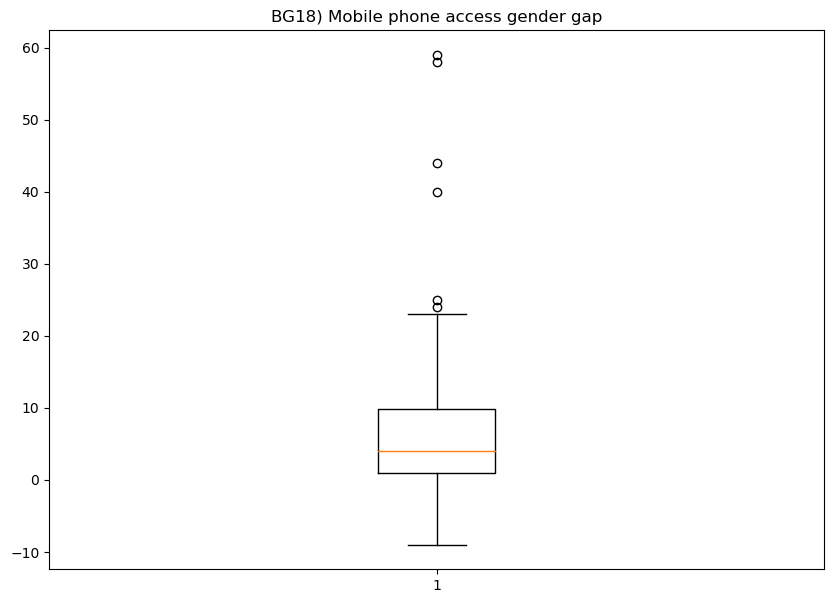

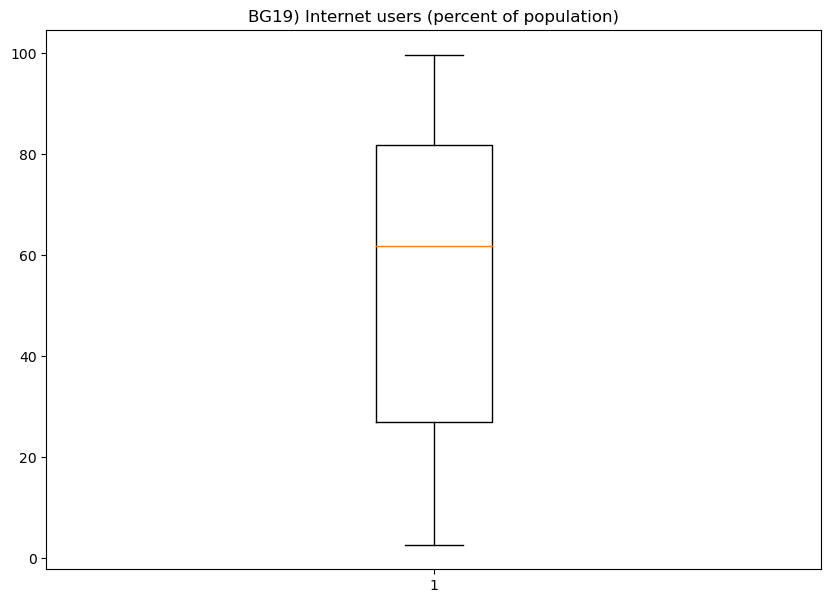

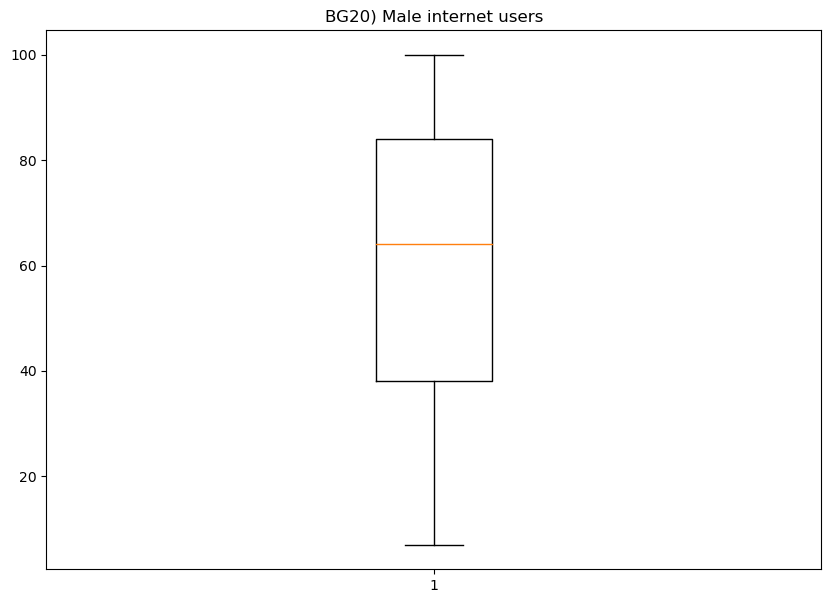

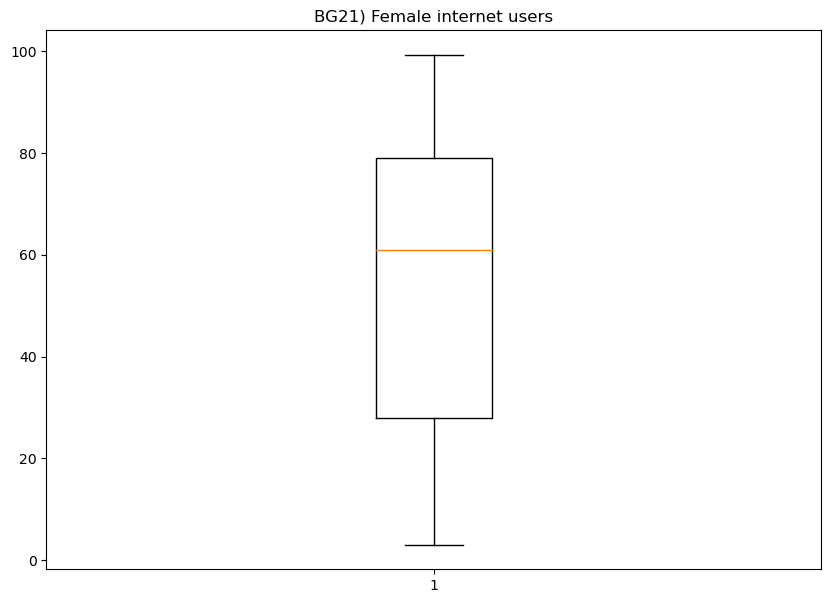

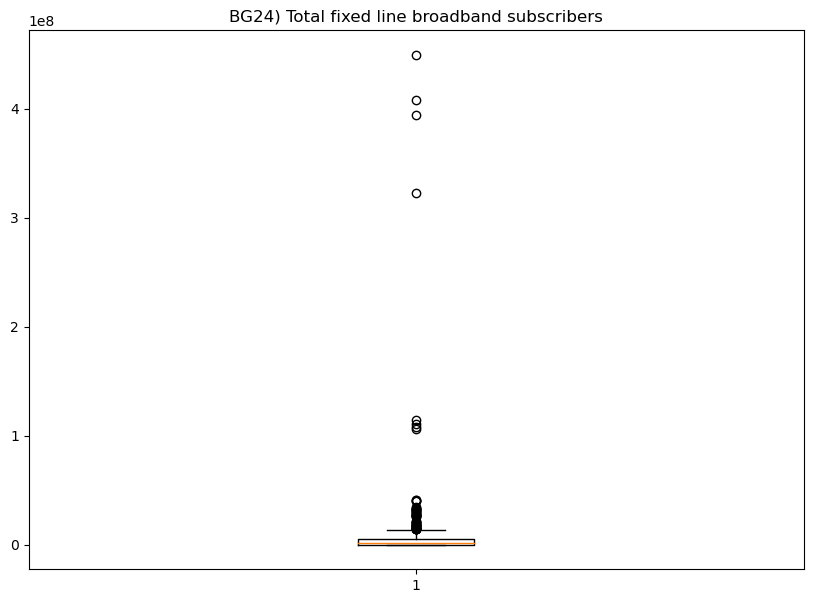

In [13]:
#Boxplots to find outliers visually
cols = df.columns
cols = cols[2:]
for col in cols:
    fig = plt.figure(figsize =(10, 7))
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [14]:
#calculating range to find outliers
quartile1 = df.quantile(0.25)
quartile3 = df.quantile(0.75)
rng = quartile3-quartile1

In [15]:
from tabulate import tabulate

ranges=zip(df.columns, rng)
print(tabulate(ranges))

------------------------------------------------------------------  ---------------
1.1.4) Gender gap in internet access                                   25.2
1.2.2) Average fixed broadband download speed                          43.35
1.2.7) Bandwidth capacity                                           69646
1.3.1) Network coverage (min. 2G)                                       4.31
1.3.2) Network coverage (min. 3G)                                      19.5
1.3.3) Network coverage (min. 4G)                                      58.15
1.3.5) Government initiatives to make Wi-Fi available                   0
1.3.6) Private sector initiatives to make Wi-Fi available               2
1.4.1) Urban electricity access                                         7
1.4.2) Rural electricity access                                        40.29
2.1.1) Smartphone cost (handset)                                       34.5
2.1.2) Mobile phone cost (prepaid tariff)                               2.63
2.1.3) 

In [16]:
df.describe()

1.1.4) Gender gap in internet access  \
count                            429.000000   
mean                              15.687879   
std                               18.807892   
min                              -16.700000   
25%                                2.100000   
50%                                8.800000   
75%                               27.300000   
max                               86.700000   

       1.2.2) Average fixed broadband download speed  \
count                                     429.000000   
mean                                       39.207133   
std                                        38.214072   
min                                         2.530000   
25%                                        11.580000   
50%                                        23.440000   
75%                                        54.930000   
max                                       203.510000   

       1.2.7) Bandwidth capacity  1.3.1) Network coverage (min. 2G)  \
count               4.290000e+02                         429.000000   
mean                1.426804e+05                          95.944149   
std                 8.785347e+05                           7.394996   
min                 4.990000e+02                          50.000000   
25%                 1.474600e+04                          95.610000   
50%                 4.431900e+04                          99.000000   
75%                 8.439200e+04                          99.920000   
max                 1.438529e+07                         100.000000   

       1.3.2) Network coverage (min. 3G)  1.3.3) Network coverage (min. 4G)  \
count                         429.000000                         429.000000   
mean                           86.986760                          68.728811   
std                            18.044832                          33.534190   
min                            20.000000                           0.000000   
25%                            80.000000                          40.350000   
50%                            95.000000                          83.050000   
75%                            99.500000                          98.500000   
max                           100.000000                         100.000000   

       1.3.5) Government initiatives to make Wi-Fi available  \
count                                         429.000000       
mean                                            1.596737       
std                                             0.750756       
min                                             0.000000       
25%                                             2.000000       
50%                                             2.000000       
75%                                             2.000000       
max                                             2.000000       

       1.3.6) Private sector initiatives to make Wi-Fi available  \
count                                         429.000000           
mean                                            1.317016           
std                                             0.881913           
min                                             0.000000           
25%                                             0.000000           
50%                                             2.000000           
75%                                             2.000000           
max                                             2.000000           

       1.4.1) Urban electricity access  1.4.2) Rural electricity access  ...  \
count                       429.000000                       429.000000  ...   
mean                         91.700723                        76.791282  ...   
std                          16.405713                        34.173803  ...   
min                          16.400000                         0.360000  ...   
25%                          93.000000                        59.710000  ...   
50%                         100.000000                  

In [17]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [18]:
outlier = (df<(quartile1-1.5*rng) ) | (df>(quartile3+1.5*rng)) 
outlier

1.1.4) Gender gap in internet access  \
1                                   False   
2                                   False   
3                                   False   
4                                   False   
6                                   False   
7                                   False   
8                                   False   
9                                   False   
11                                  False   
12                                  False   
13                                  False   
14                                  False   
16                                  False   
17                                  False   
18                                  False   
19                                  False   
21                                  False   
22                                  False   
23                                  False   
24                                  False   
28                                  False   
29                                  False   
33                                  False   
34                                  False   
36                                  False   
37                                  False   
38                                  False   
39                                  False   
41                                  False   
42                                  False   
43                                  False   
44                                  False   
47                                  False   
48                                  False   
49                                  False   
51                                  False   
52                                  False   
53                                  False   
54                                  False   
56                                  False   
57                                  False   
58                                  False   
59                                  False   
61                                  False   
62                                  False   
63                                  False   
64                                  False   
66                                  False   
67                                  False   
68                                  False   
69                                  False   
73                                  False   
74                                  False   
76                                  False   
77                                  False   
78                                  False   
79                                  False   
81                                  False   
82                                  False   
83                                  False   
84                                  False   
86                                  False   
87                                  False   
88                                  False   
89                                  False   
91                                  False   
92                                  False   
93                                  False   
94                                  False   
96                                  False   
97                                  False   
98                                  False   
99                                  False   
101                                 False   
102                                 False   
103                                 False   
104                                 False   
106                                 False   
107                                 False   
108                                 False   
109                                 False   
112                                 False   
113                                 False   
114                                 False   
116                                 False   
117                                 False   
118                                 False   
119                                 False   


In [19]:
#Function to calculate number of users relative to population of a country
def users_rel_population(df, col):
    df[col] = df[col] / df['BG2) Population']
users_rel_population(df, 'BG20) Male internet users')
users_rel_population(df, 'BG21) Female internet users')
users_rel_population(df, 'BG24) Total fixed line broadband subscribers')

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
#target variables
labels = ['BG5) GINI coefficient',
'BG10) Global Peace Index',
'BG11) Democracy Index',
'BG12) Corruption Perceptions Index',
'BG14) UN E-Government Development Index']

In [22]:
y = df[labels]

In [23]:
y

BG5) GINI coefficient  BG10) Global Peace Index  BG11) Democracy Index  \
1                     27.6                       2.2                    3.6   
2                     27.6                       2.2                    3.6   
3                     27.6                       2.3                    3.5   
4                     27.6                       2.3                    4.0   
6                     42.7                       2.1                    3.4   
7                     51.3                       2.0                    3.6   
8                     51.3                       2.1                    3.6   
9                     51.3                       2.1                    3.7   
11                    41.2                       1.9                    7.0   
12                    41.4                       1.9                    7.0   
13                    41.4                       2.0                    7.0   
14                    41.4                       2.0                    7.0   
16                    34.4                       1.4                    9.0   
17                    34.4                       1.4                    9.1   
18                    34.4                       1.4                    9.1   
19                    34.4                       1.4                    9.1   
21                    29.7                       1.3                    8.4   
22                    29.7                       1.3                    8.4   
23                    29.7                       1.3                    8.3   
24                    29.7                       1.3                    8.3   
28                    26.6                       2.5                    2.7   
29                    26.6                       2.3                    2.8   
33                    34.4                       2.3                    2.7   
34                    34.4                       2.2                    2.6   
36                    32.4                       2.0                    5.7   
37                    32.4                       2.1                    5.4   
38                    32.4                       2.2                    5.6   
39                    32.4                       2.1                    5.9   
41                    27.4                       1.5                    7.8   
42                    27.4                       1.6                    7.8   
43                    27.4                       1.6                    7.8   
44                    27.4                       1.5                    7.6   
47                    47.8                       2.0                    5.6   
48                    47.8                       2.0                    5.7   
49                    47.8                       2.2                    5.1   
51                    53.3                       1.6                    7.9   
52                    53.3                       1.7                    7.8   
53                    53.3                       1.7                    7.8   
54                    53.3                       1.7                    7.8   
56                    53.3                       2.2                    6.9   
57                    53.9                       2.2                    6.9   
58                    53.9                       2.4                    7.0   
59                    53.9                       2.4                    6.9   
61                    40.4                       1.6                    7.0   
62                    40.4                       1.6                    7.0   
63                    40.4                       1.6                    7.0   
64                    40.4                       1.6                    7.0   
66                    35.3                       2.1                    4.7   
67                    35.3                       2.0                    4.8   
68                    35.3                       2.2   

In [24]:
X = df.drop(labels, axis = 1)

In [25]:
X

1.1.4) Gender gap in internet access  \
1                                    22.0   
2                                    11.7   
3                                    21.7   
4                                    10.9   
6                                    39.9   
7                                    38.9   
8                                    27.8   
9                                    30.6   
11                                   -4.5   
12                                   -4.5   
13                                   -5.7   
14                                   -2.6   
16                                    4.3   
17                                    3.2   
18                                    4.3   
19                                    2.1   
21                                    7.3   
22                                   -1.1   
23                                   10.3   
24                                    2.2   
28                                   15.0   
29                                   12.2   
33                                   -4.4   
34                                   -1.1   
36                                   63.2   
37                                   51.9   
38                                   55.6   
39                                   55.6   
41                                    3.4   
42                                    7.8   
43                                    2.1   
44                                    4.3   
47                                   53.8   
48                                   45.2   
49                                   63.2   
51                                   35.6   
52                                   37.5   
53                                   32.3   
54                                   36.1   
56                                    1.6   
57                                   -9.2   
58                                   -3.2   
59                                   -2.7   
61                                   -3.1   
62                                    4.5   
63                                    0.0   
64                                   -1.5   
66                                   42.1   
67                                   56.5   
68                                    9.1   
69                                   37.5   
73                                   40.0   
74                                   40.0   
76                                   38.2   
77                                   29.4   
78                                   32.0   
79                                   21.2   
81                                   45.2   
82                                   22.6   
83                                    8.3   
84                                   11.4   
86                                    0.0   
87                                    1.1   
88                                    4.2   
89                                    2.1   
91                                   -2.9   
92                                   -2.9   
93                                    1.4   
94                                    3.7   
96                                    4.5   
97                                    3.0   
98                                   -7.9   
99                                   -7.5   
101                                  11.1   
102                                   0.0   
103                                  18.3   
104                                   4.5   
106                                  56.0   
107                                  42.3   
108                                  42.3   
109                                  42.3   
112                                   5.0   
113                                   3.8   
114                                  -3.7   
116                                  45.8   
117                                  37.5   
118                                  34.1   
119                                  24.1   


In [26]:
X.shape

(429, 52)

## Correlation

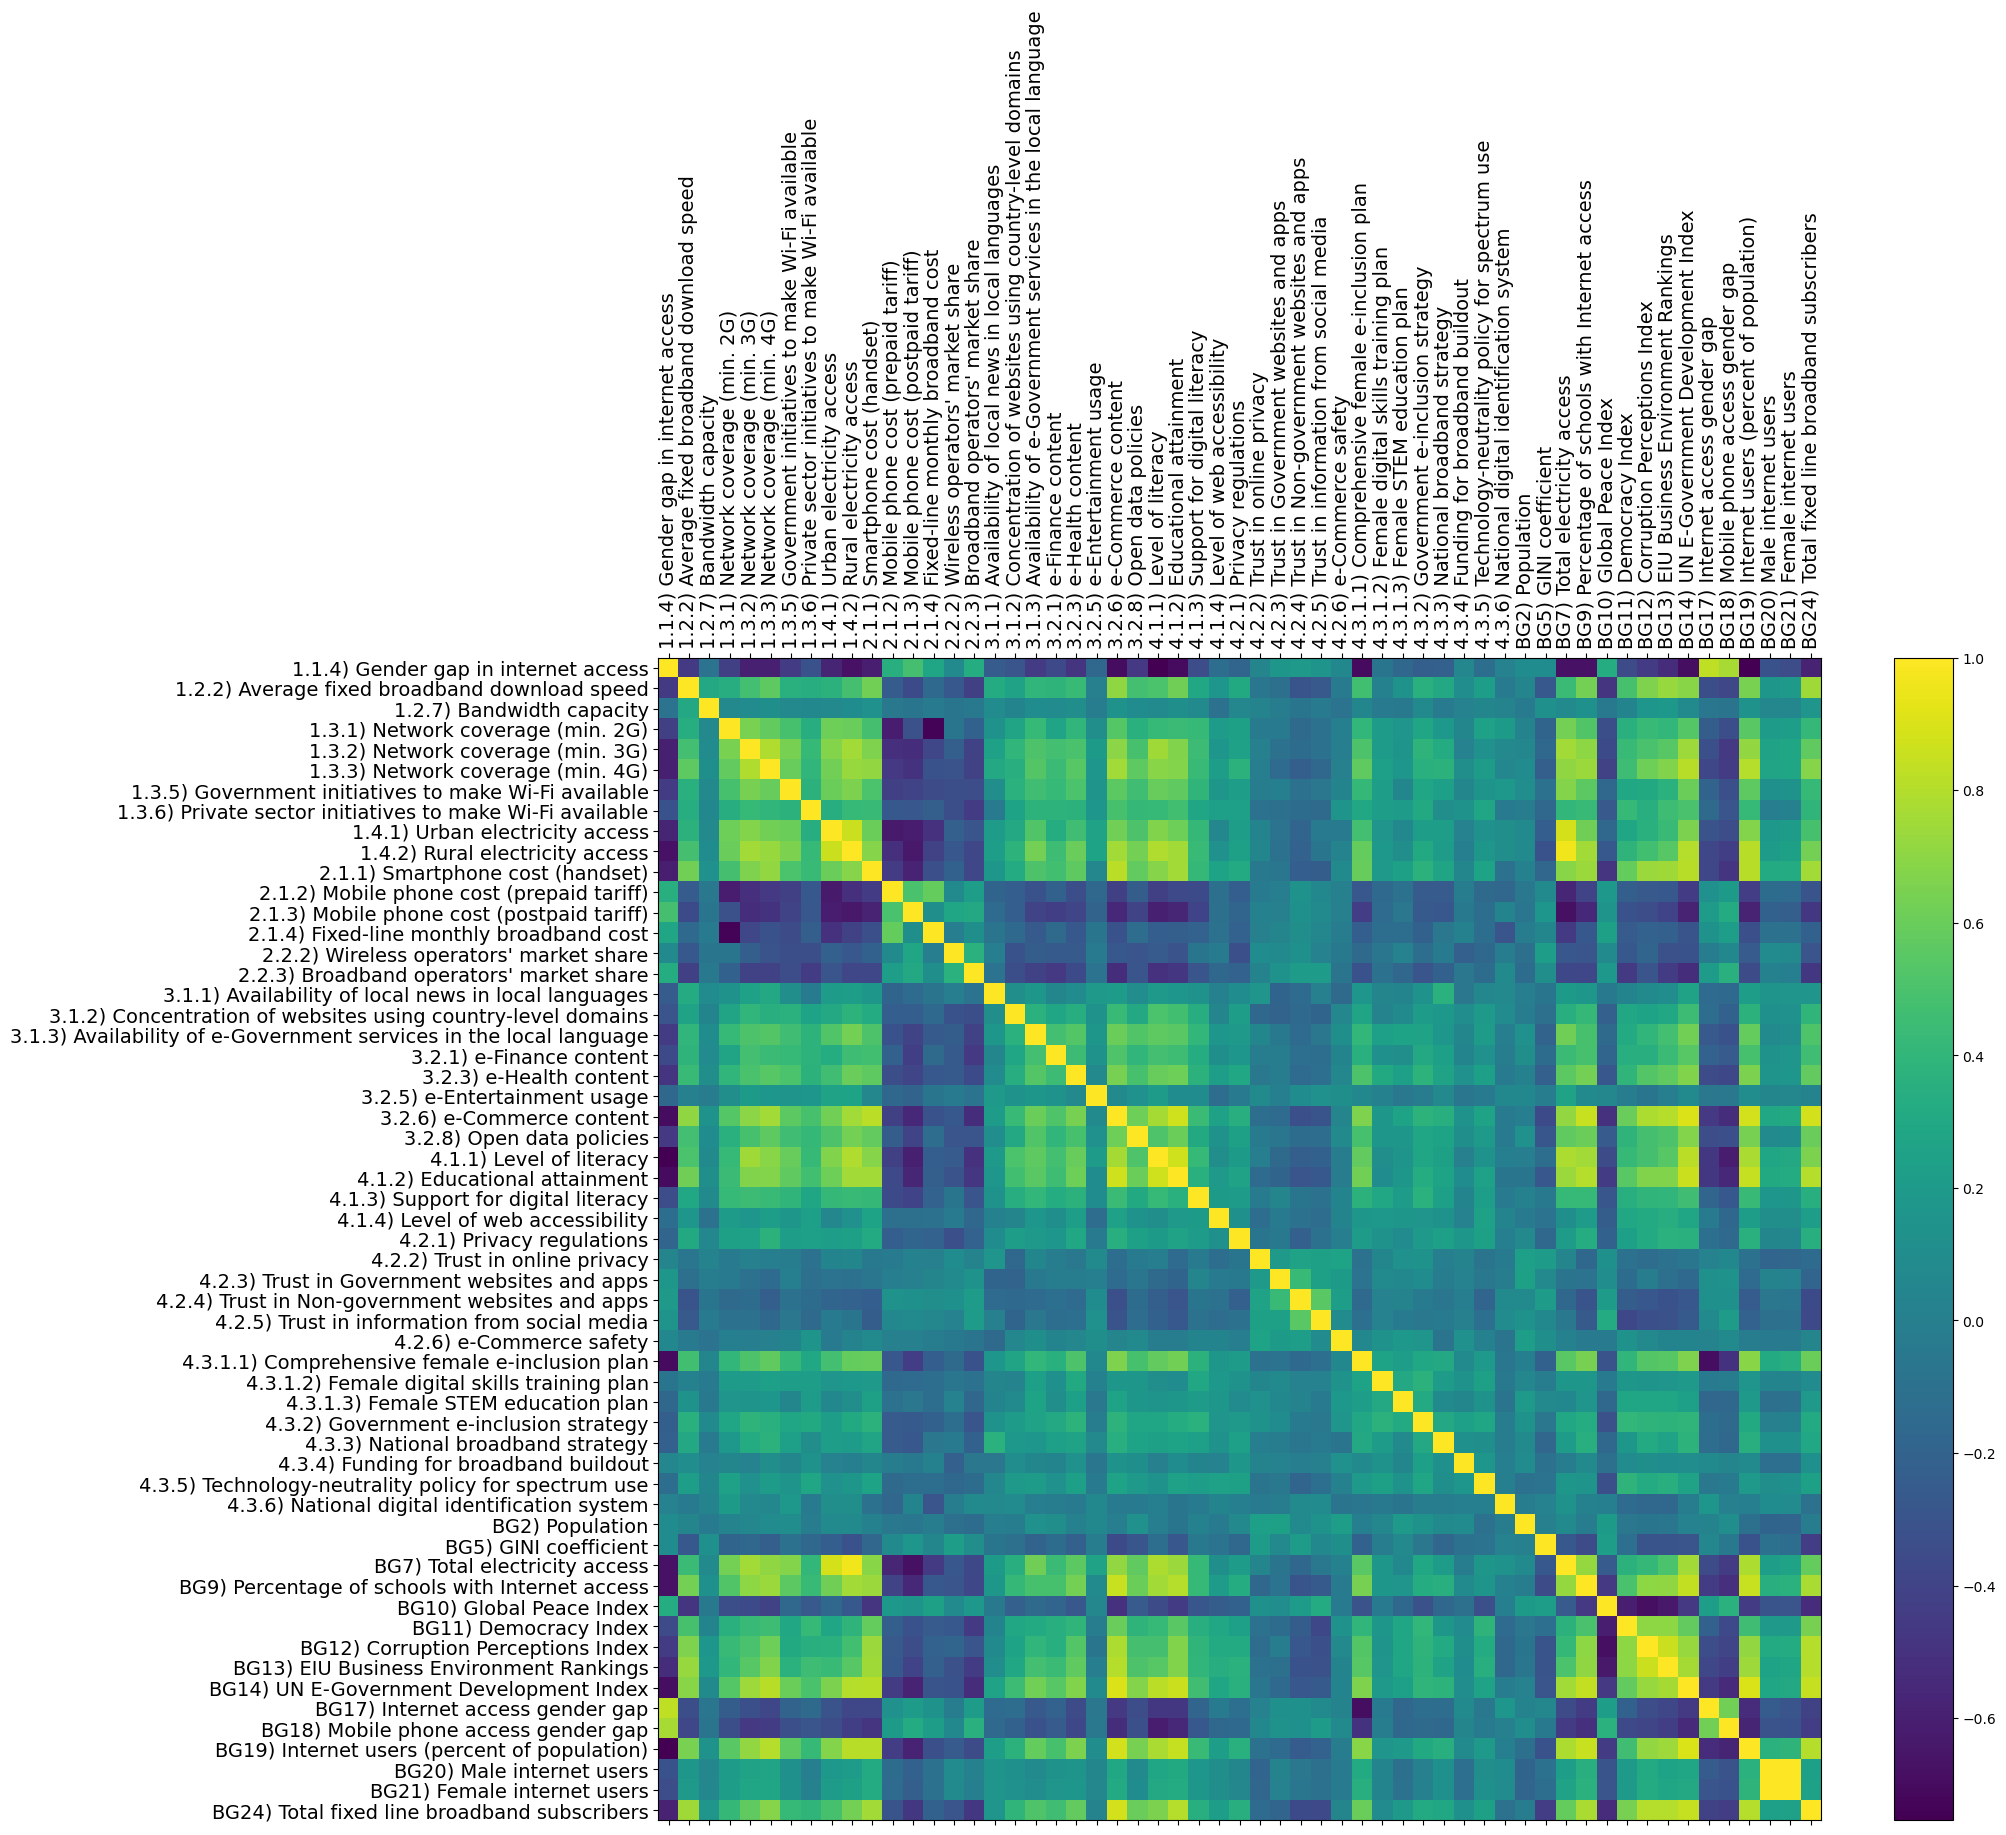

In [27]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()

## Data visualisation

In [28]:
##Using bar plots for the categorical variables
categorical = ['1.3.5) Government initiatives to make Wi-Fi available','1.3.6) Private sector initiatives to make Wi-Fi available',
'3.1.1) Availability of local news in local languages',
'3.1.2) Concentration of websites using country-level domains',
'3.1.3) Availability of e-Government services in the local language',
'3.2.1) e-Finance content',
'3.2.3) e-Health content',
'3.2.8) Open data policies',
'4.1.3) Support for digital literacy',
'4.1.4) Level of web accessibility',
'4.2.1) Privacy regulations',
'4.3.1.1) Comprehensive female e-inclusion plan',
'4.3.1.2) Female digital skills training plan',
'4.3.1.3) Female STEM education plan',
'4.3.2) Government e-inclusion strategy',
'4.3.3) National broadband strategy',
'4.3.4) Funding for broadband buildout',
'4.3.5) Technology-neutrality policy for spectrum use',
'4.3.6) National digital identification system']

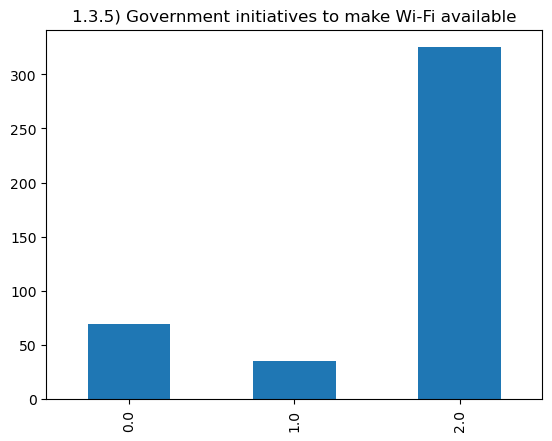

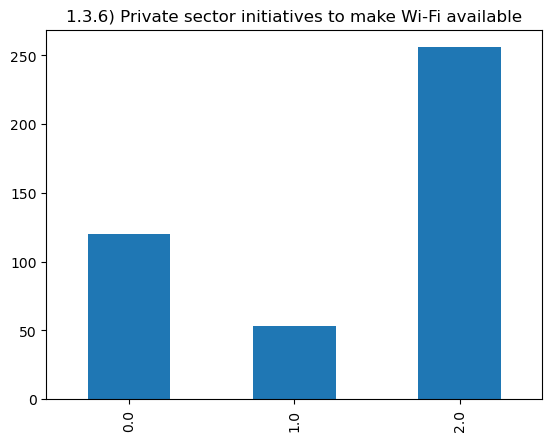

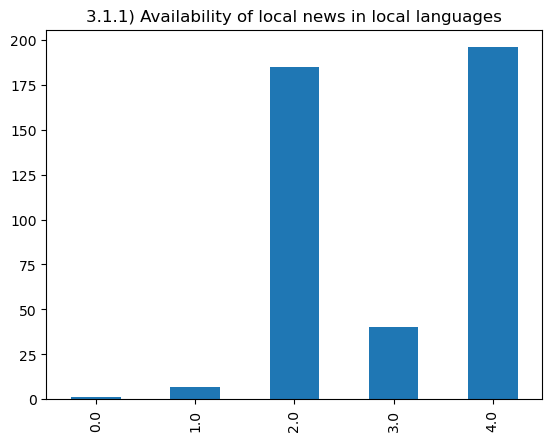

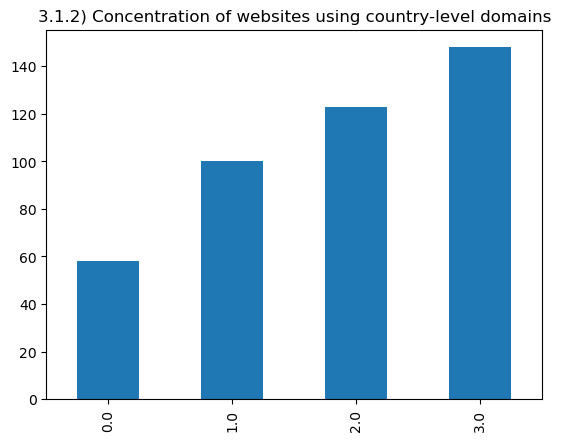

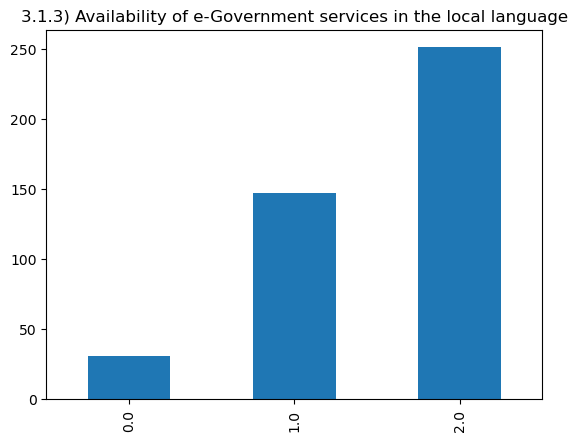

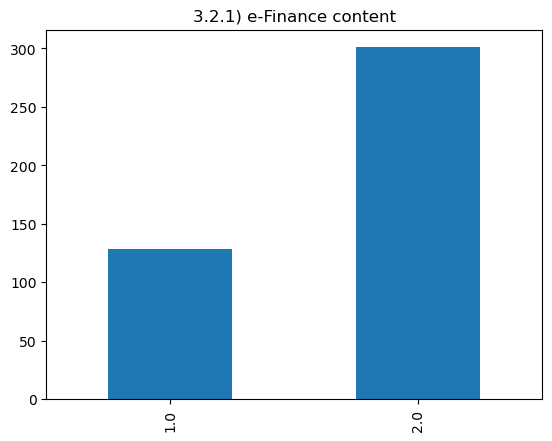

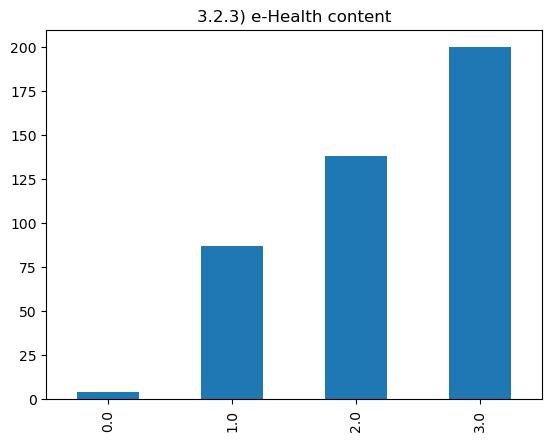

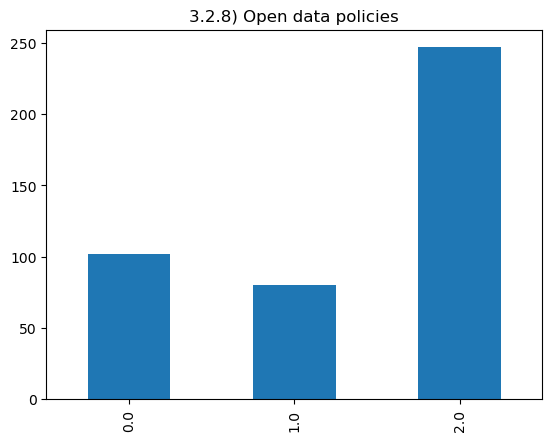

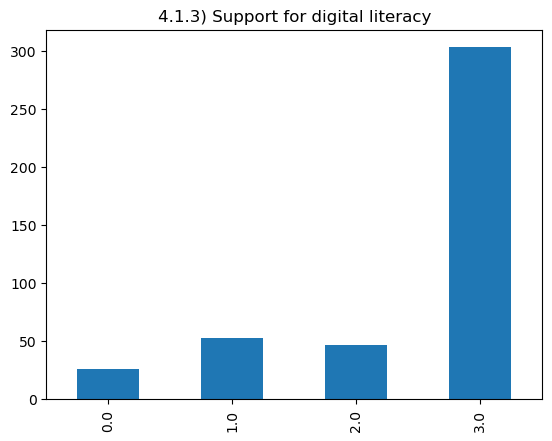

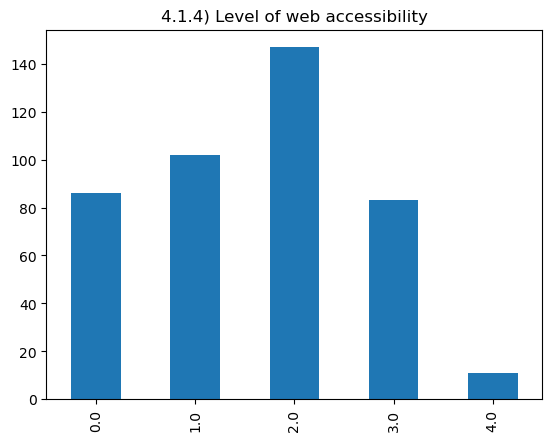

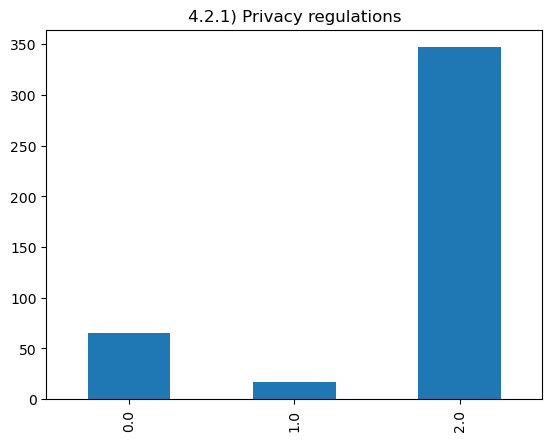

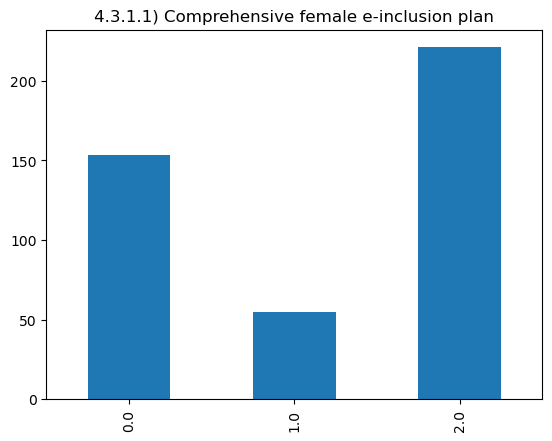

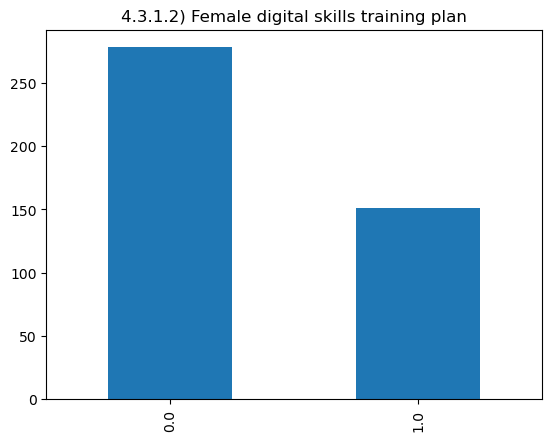

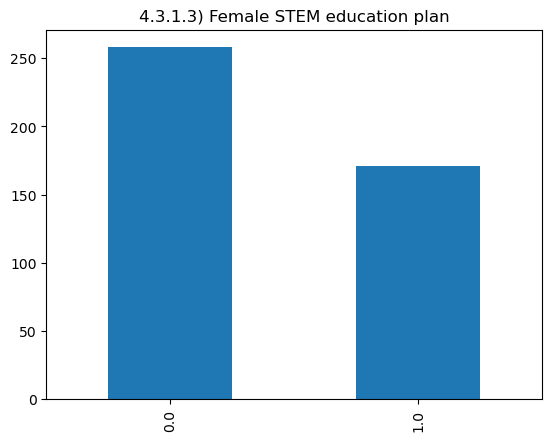

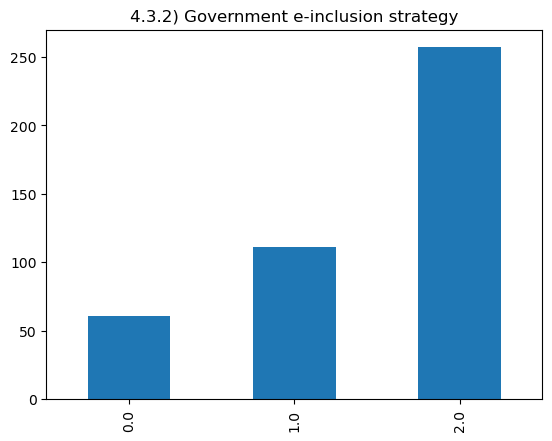

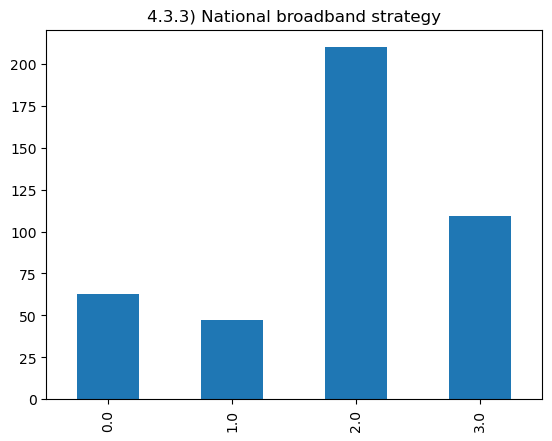

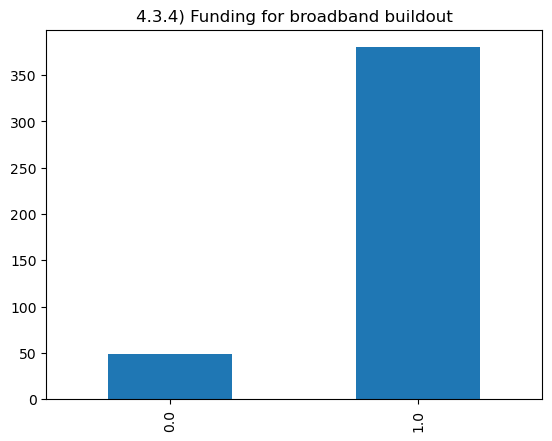

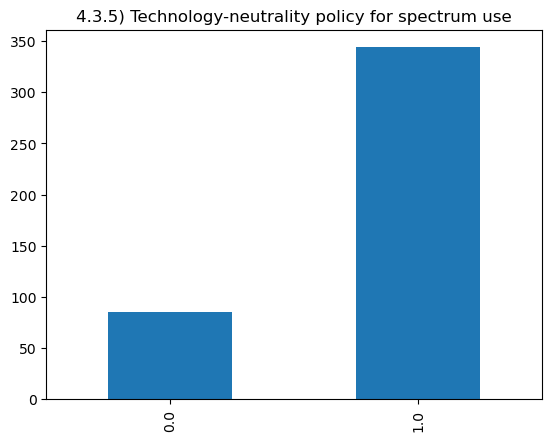

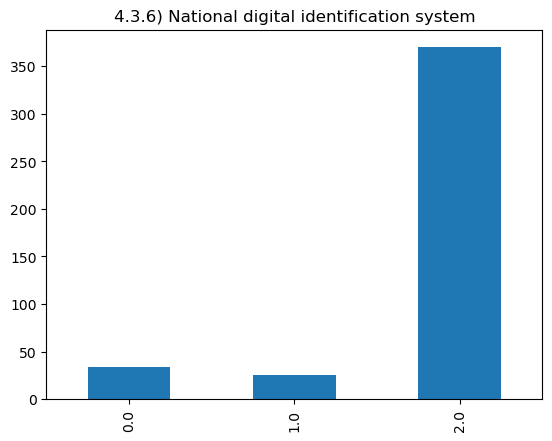

In [29]:
#bar graphs for categorical data
for col in categorical:
    df[col].value_counts().sort_index().plot(kind = 'bar')
    plt.title(col)
    plt.show()

In [30]:
numeric = []
for i in df.columns:
    if i not in categorical and i not in labels:
        numeric.append(i)
numeric

['1.1.4) Gender gap in internet access',
 '1.2.2) Average fixed broadband download speed',
 '1.2.7) Bandwidth capacity',
 '1.3.1) Network coverage (min. 2G)',
 '1.3.2) Network coverage (min. 3G)',
 '1.3.3) Network coverage (min. 4G)',
 '1.4.1) Urban electricity access',
 '1.4.2) Rural electricity access',
 '2.1.1) Smartphone cost (handset)',
 '2.1.2) Mobile phone cost (prepaid tariff)',
 '2.1.3) Mobile phone cost (postpaid tariff)',
 '2.1.4) Fixed-line monthly broadband cost',
 "2.2.2) Wireless operators' market share",
 "2.2.3) Broadband operators' market share",
 '3.2.5) e-Entertainment usage',
 '3.2.6) e-Commerce content',
 '4.1.1) Level of literacy',
 '4.1.2) Educational attainment',
 '4.2.2) Trust in online privacy',
 '4.2.3) Trust in Government websites and apps',
 '4.2.4) Trust in Non-government websites and apps',
 '4.2.5) Trust in information from social media',
 '4.2.6) e-Commerce safety',
 'BG2) Population',
 'BG7) Total electricity access',
 'BG9) Percentage of schools with

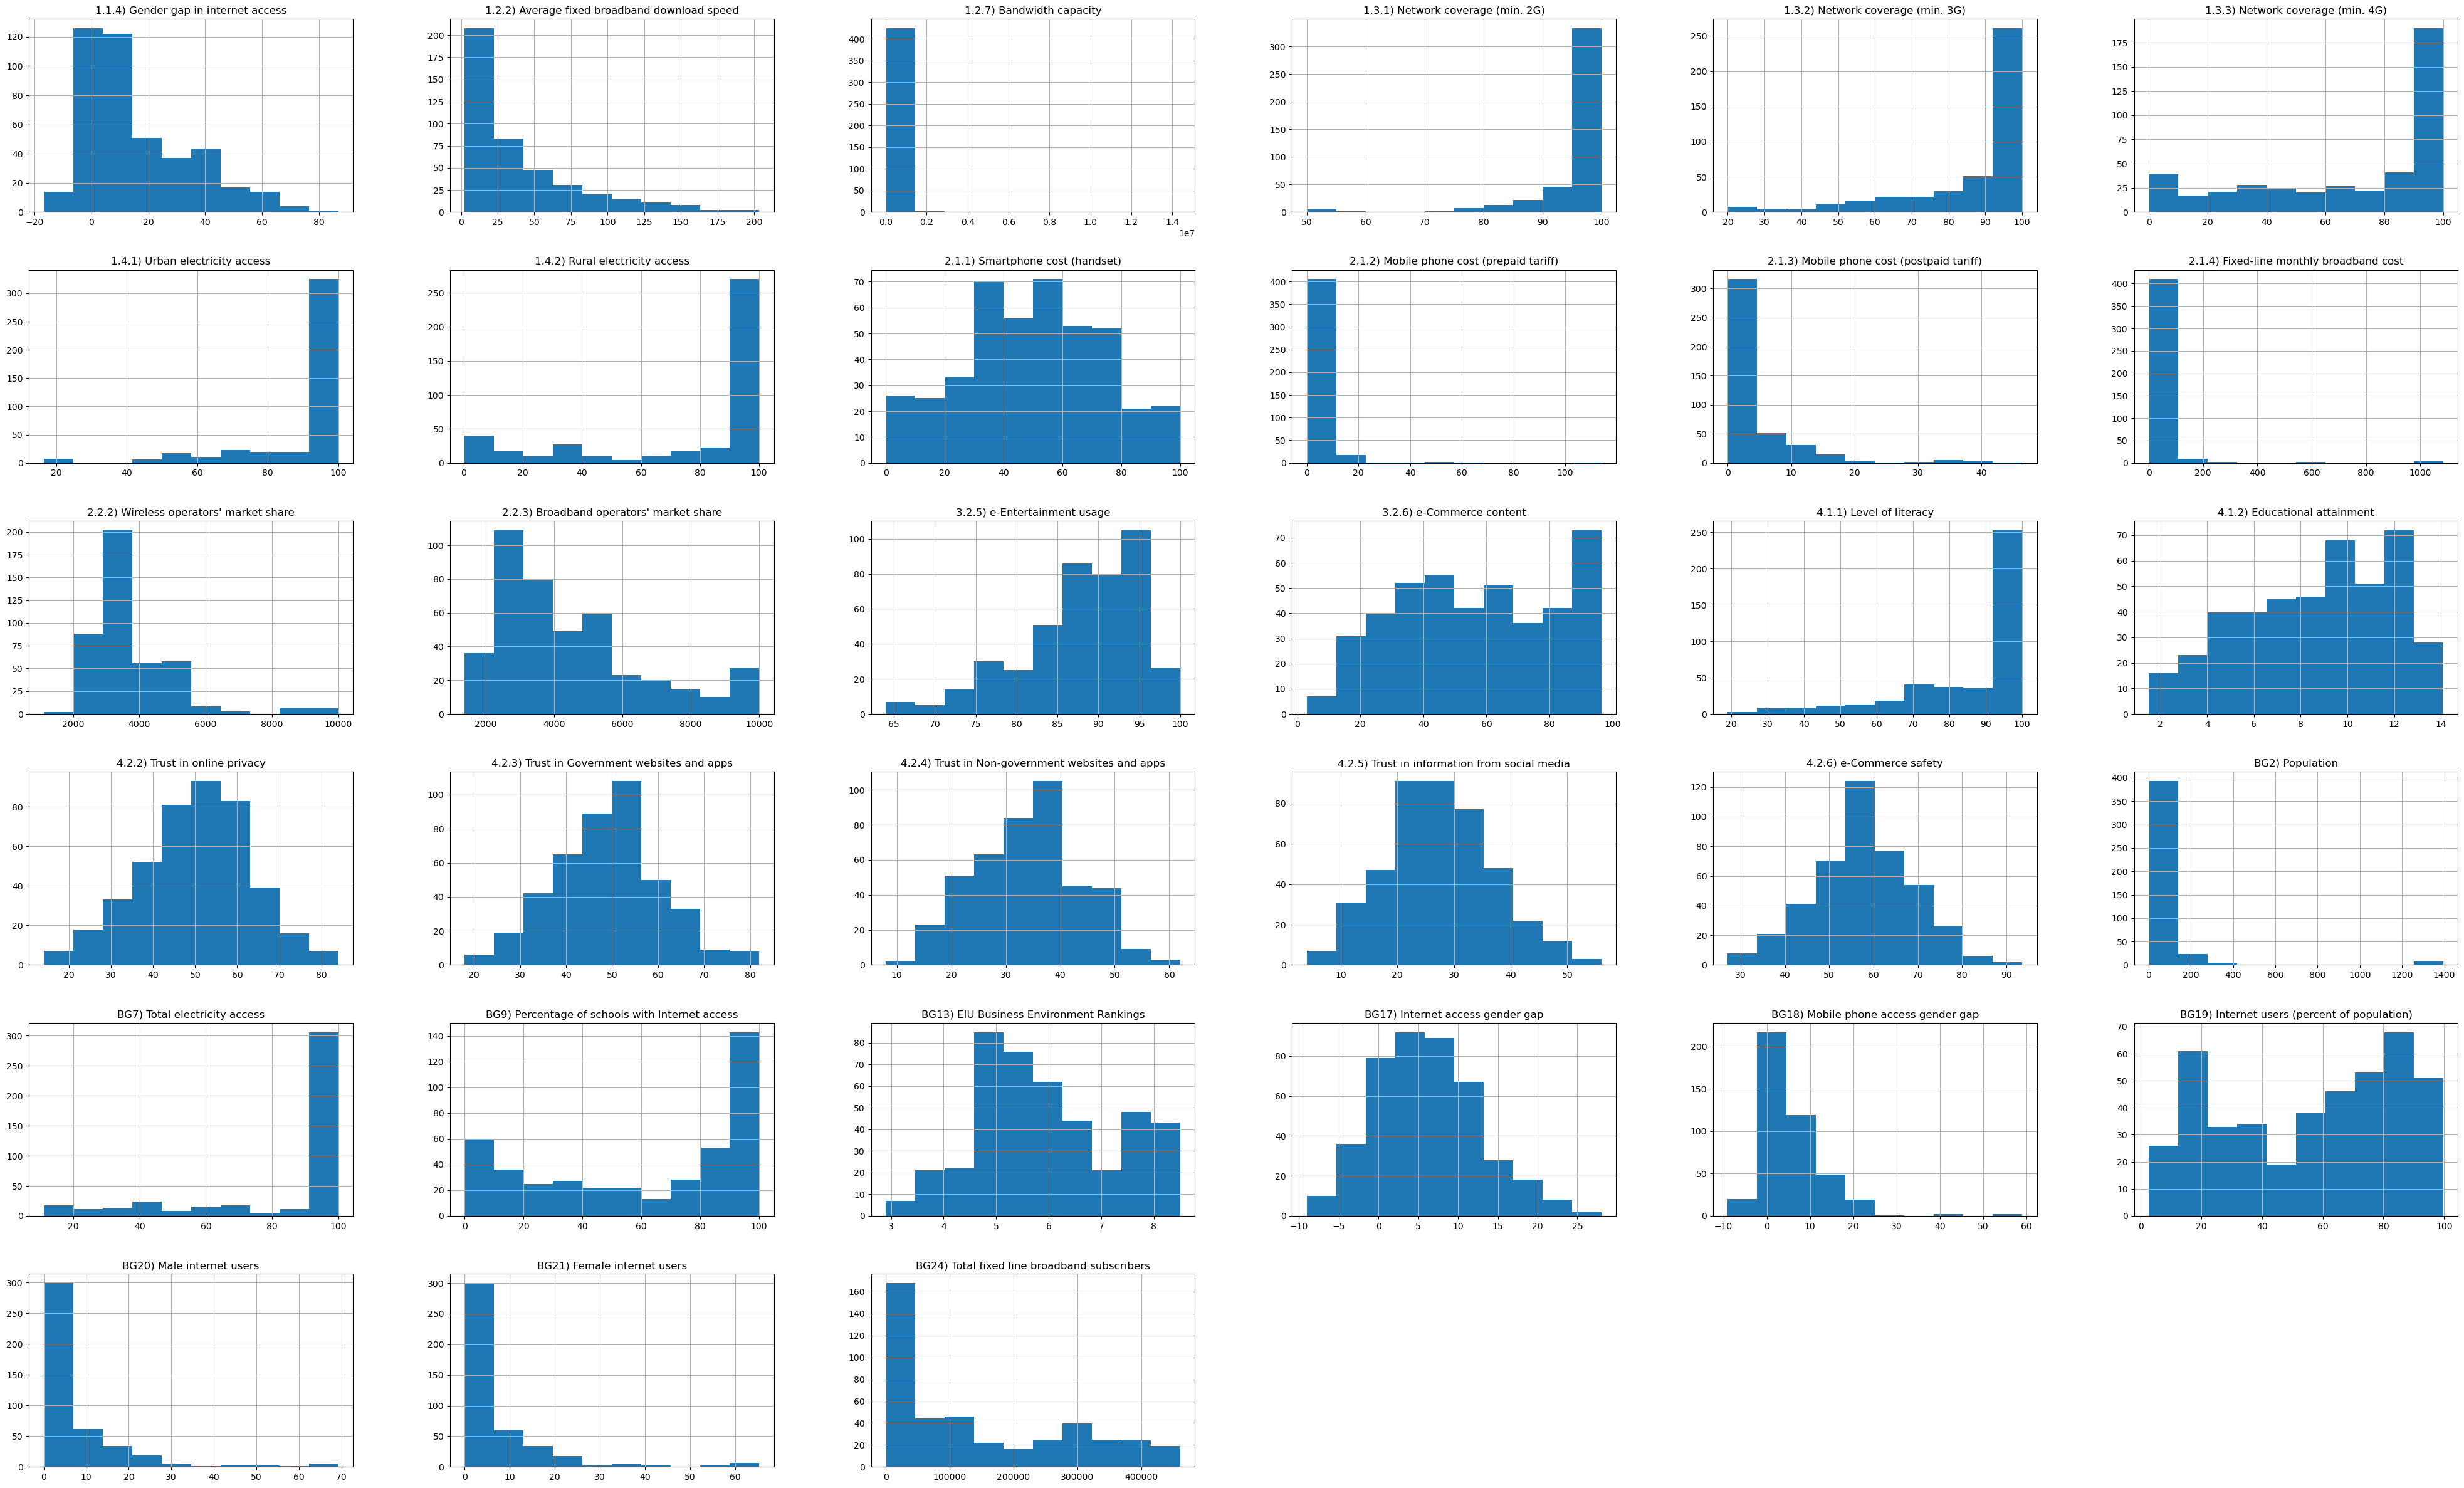

In [31]:
#histograms for numerical data
import random
his= df.hist(column=numeric,figsize=(50,30))

In [32]:
df.to_csv('cleaned_data.csv')